In [94]:
#Import the necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")
%matplotlib inline
sns.set(color_codes=True)
plt.style.use('fivethirtyeight')
from sklearn.preprocessing import StandardScaler

In [2]:
train_data = pd.read_csv("train.csv")
test_data = pd.read_csv("test.csv")

In [3]:
train_data.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [4]:
test_data.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition
0,1461,20,RH,80.0,11622,Pave,NaN,Reg,Lvl,AllPub,...,120,0,NaN,MnPrv,NaN,0,6,2010,WD,Normal
1,1462,20,RL,81.0,14267,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,NaN,Gar2,12500,6,2010,WD,Normal
2,1463,60,RL,74.0,13830,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,MnPrv,NaN,0,3,2010,WD,Normal
3,1464,60,RL,78.0,9978,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,NaN,NaN,0,6,2010,WD,Normal
4,1465,120,RL,43.0,5005,Pave,NaN,IR1,HLS,AllPub,...,144,0,NaN,NaN,NaN,0,1,2010,WD,Normal


# EDA

In [5]:
train_data.shape

(1460, 81)

In [6]:
test_data.shape

(1459, 80)

In [7]:
train_data.describe().T

,count,mean,std,min,25%,50%,75%,max
Id,1460.0,730.500000,421.610009,1.0,365.75,730.5,1095.25,1460.0
MSSubClass,1460.0,56.897260,42.300571,20.0,20.00,50.0,70.00,190.0
LotFrontage,1201.0,70.049958,24.284752,21.0,59.00,69.0,80.00,313.0
LotArea,1460.0,10516.828082,9981.264932,1300.0,7553.50,9478.5,11601.50,215245.0
OverallQual,1460.0,6.099315,1.382997,1.0,5.00,6.0,7.00,10.0
OverallCond,1460.0,5.575342,1.112799,1.0,5.00,5.0,6.00,9.0
YearBuilt,1460.0,1971.267808,30.202904,1872.0,1954.00,1973.0,2000.00,2010.0
YearRemodAdd,1460.0,1984.865753,20.645407,1950.0,1967.00,1994.0,2004.00,2010.0
MasVnrArea,1452.0,103.685262,181.066207,0.0,0.00,0.0,166.00,1600.0
BsmtFinSF1,1460.0,443.639726,456.098091,0.0,0.00,383.5,712.25,5644.0


In [8]:
test_data.describe().T

,count,mean,std,min,25%,50%,75%,max
Id,1459.0,2190.000000,421.321334,1461.0,1825.50,2190.0,2554.50,2919.0
MSSubClass,1459.0,57.378341,42.746880,20.0,20.00,50.0,70.00,190.0
LotFrontage,1232.0,68.580357,22.376841,21.0,58.00,67.0,80.00,200.0
LotArea,1459.0,9819.161069,4955.517327,1470.0,7391.00,9399.0,11517.50,56600.0
OverallQual,1459.0,6.078821,1.436812,1.0,5.00,6.0,7.00,10.0
OverallCond,1459.0,5.553804,1.113740,1.0,5.00,5.0,6.00,9.0
YearBuilt,1459.0,1971.357779,30.390071,1879.0,1953.00,1973.0,2001.00,2010.0
YearRemodAdd,1459.0,1983.662783,21.130467,1950.0,1963.00,1992.0,2004.00,2010.0
MasVnrArea,1444.0,100.709141,177.625900,0.0,0.00,0.0,164.00,1290.0
BsmtFinSF1,1458.0,439.203704,455.268042,0.0,0.00,350.5,753.50,4010.0


In [9]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

In [10]:
test_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1459 entries, 0 to 1458
Data columns (total 80 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1459 non-null   int64  
 1   MSSubClass     1459 non-null   int64  
 2   MSZoning       1455 non-null   object 
 3   LotFrontage    1232 non-null   float64
 4   LotArea        1459 non-null   int64  
 5   Street         1459 non-null   object 
 6   Alley          107 non-null    object 
 7   LotShape       1459 non-null   object 
 8   LandContour    1459 non-null   object 
 9   Utilities      1457 non-null   object 
 10  LotConfig      1459 non-null   object 
 11  LandSlope      1459 non-null   object 
 12  Neighborhood   1459 non-null   object 
 13  Condition1     1459 non-null   object 
 14  Condition2     1459 non-null   object 
 15  BldgType       1459 non-null   object 
 16  HouseStyle     1459 non-null   object 
 17  OverallQual    1459 non-null   int64  
 18  OverallC

# CLEANING THE TRAIN DATA

In [11]:
train_data.columns.values

array(['Id', 'MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'Street',
       'Alley', 'LotShape', 'LandContour', 'Utilities', 'LotConfig',
       'LandSlope', 'Neighborhood', 'Condition1', 'Condition2',
       'BldgType', 'HouseStyle', 'OverallQual', 'OverallCond',
       'YearBuilt', 'YearRemodAdd', 'RoofStyle', 'RoofMatl',
       'Exterior1st', 'Exterior2nd', 'MasVnrType', 'MasVnrArea',
       'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual', 'BsmtCond',
       'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1', 'BsmtFinType2',
       'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'Heating', 'HeatingQC',
       'CentralAir', 'Electrical', '1stFlrSF', '2ndFlrSF', 'LowQualFinSF',
       'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath',
       'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual',
       'TotRmsAbvGrd', 'Functional', 'Fireplaces', 'FireplaceQu',
       'GarageType', 'GarageYrBlt', 'GarageFinish', 'GarageCars',
       'GarageArea', 'GarageQual', 'GarageCond', 'Pav

In [12]:
#Checking the total number of categorical and numerical columns
cat_cols=train_data.select_dtypes(include=['object']).columns
num_cols = train_data.select_dtypes(include=np.number).columns.tolist()
#categorical
print("Categorical Variables:")
print(cat_cols)
print("sum of cat_variables:",len(cat_cols))
#numerical
print("Numerical Variables:")
print(num_cols)
print("sum of numerical_variables:",len(num_cols))

Categorical Variables:
Index(['MSZoning', 'Street', 'Alley', 'LotShape', 'LandContour', 'Utilities',
       'LotConfig', 'LandSlope', 'Neighborhood', 'Condition1', 'Condition2',
       'BldgType', 'HouseStyle', 'RoofStyle', 'RoofMatl', 'Exterior1st',
       'Exterior2nd', 'MasVnrType', 'ExterQual', 'ExterCond', 'Foundation',
       'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2',
       'Heating', 'HeatingQC', 'CentralAir', 'Electrical', 'KitchenQual',
       'Functional', 'FireplaceQu', 'GarageType', 'GarageFinish', 'GarageQual',
       'GarageCond', 'PavedDrive', 'PoolQC', 'Fence', 'MiscFeature',
       'SaleType', 'SaleCondition'],
      dtype='object')
sum of cat_variables: 43
Numerical Variables:
['Id', 'MSSubClass', 'LotFrontage', 'LotArea', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd', 'MasVnrArea', 'BsmtFinSF1', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', '1stFlrSF', '2ndFlrSF', 'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'Full

In [13]:
#check for duplicates
train_data.duplicated().sum()

0

In [14]:
#Check for missing values
train_data.isnull().values.sum()

7829

In [15]:
#Number and percentage of missing values according to columns
{col: [train_data[col].isnull().sum(),f'% {np.round(np.mean(train_data[col].isnull()*100),)}'
] for col in train_data.columns if train_data[col].isnull().any()}

{'LotFrontage': [259, '% 18.0'],
 'Alley': [1369, '% 94.0'],
 'MasVnrType': [872, '% 60.0'],
 'MasVnrArea': [8, '% 1.0'],
 'BsmtQual': [37, '% 3.0'],
 'BsmtCond': [37, '% 3.0'],
 'BsmtExposure': [38, '% 3.0'],
 'BsmtFinType1': [37, '% 3.0'],
 'BsmtFinType2': [38, '% 3.0'],
 'Electrical': [1, '% 0.0'],
 'FireplaceQu': [690, '% 47.0'],
 'GarageType': [81, '% 6.0'],
 'GarageYrBlt': [81, '% 6.0'],
 'GarageFinish': [81, '% 6.0'],
 'GarageQual': [81, '% 6.0'],
 'GarageCond': [81, '% 6.0'],
 'PoolQC': [1453, '% 100.0'],
 'Fence': [1179, '% 81.0'],
 'MiscFeature': [1406, '% 96.0']}

{'LotFrontage': [259, '% 18.0'], 'Alley': [1369, '% 94.0'], 'MasVnrType': [872, '% 60.0'], 'MasVnrArea': [8, '% 1.0'], 'BsmtQual': [37, '% 3.0'], 'BsmtCond': [37, '% 3.0'], 'BsmtExposure': [38, '% 3.0'], 'BsmtFinType1': [37, '% 3.0'], 'BsmtFinType2': [38, '% 3.0'], 'Electrical': [1, '% 0.0'], 'FireplaceQu': [690, '% 47.0'], 'GarageType': [81, '% 6.0'], 'GarageYrBlt': [81, '% 6.0'], 'GarageFinish': [81, '% 6.0'], 'GarageQual': [81, '% 6.0'], 'GarageCond': [81, '% 6.0'], 'PoolQC': [1453, '% 100.0'], 'Fence': [1179, '% 81.0'], 'MiscFeature': [1406, '% 96.0']}


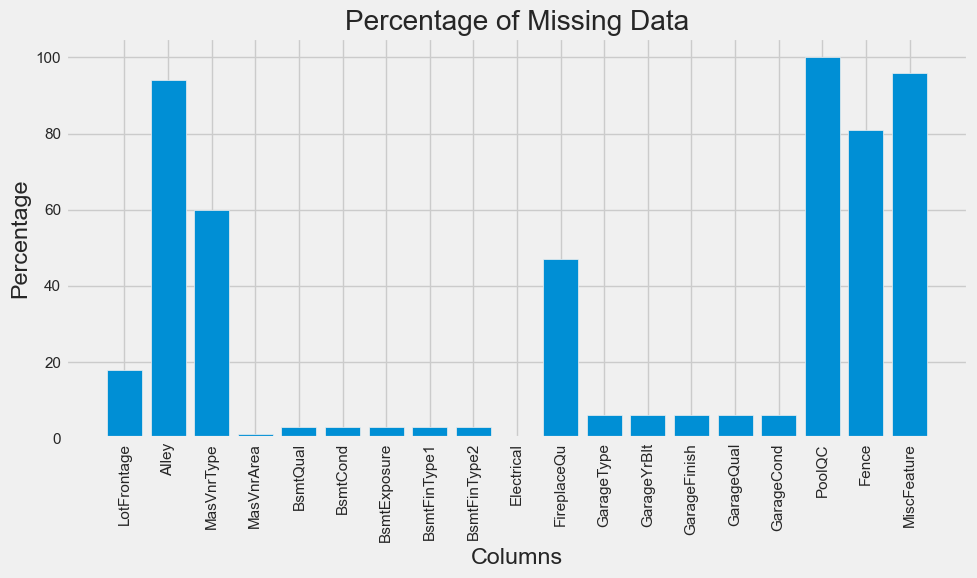

In [16]:
 # calculate missing values
missing_data = {col: [train_data[col].isnull().sum(), f'% {np.round(np.mean(train_data[col].isnull()*100))}']
                for col in train_data.columns if train_data[col].isnull().any()}
print(missing_data)

# Extracting column names and corresponding missing percentages
columns = list(missing_data.keys())
percentages = [float(value[1].strip('% ')) for value in missing_data.values()]

# Creating the plot
plt.figure(figsize=(10, 6))
plt.bar(columns, percentages)

# Customizing the plot
plt.title('Percentage of Missing Data')
plt.xlabel('Columns')
plt.ylabel('Percentage')
plt.xticks(rotation=90)

# Displaying the plot
plt.tight_layout()
plt.show()

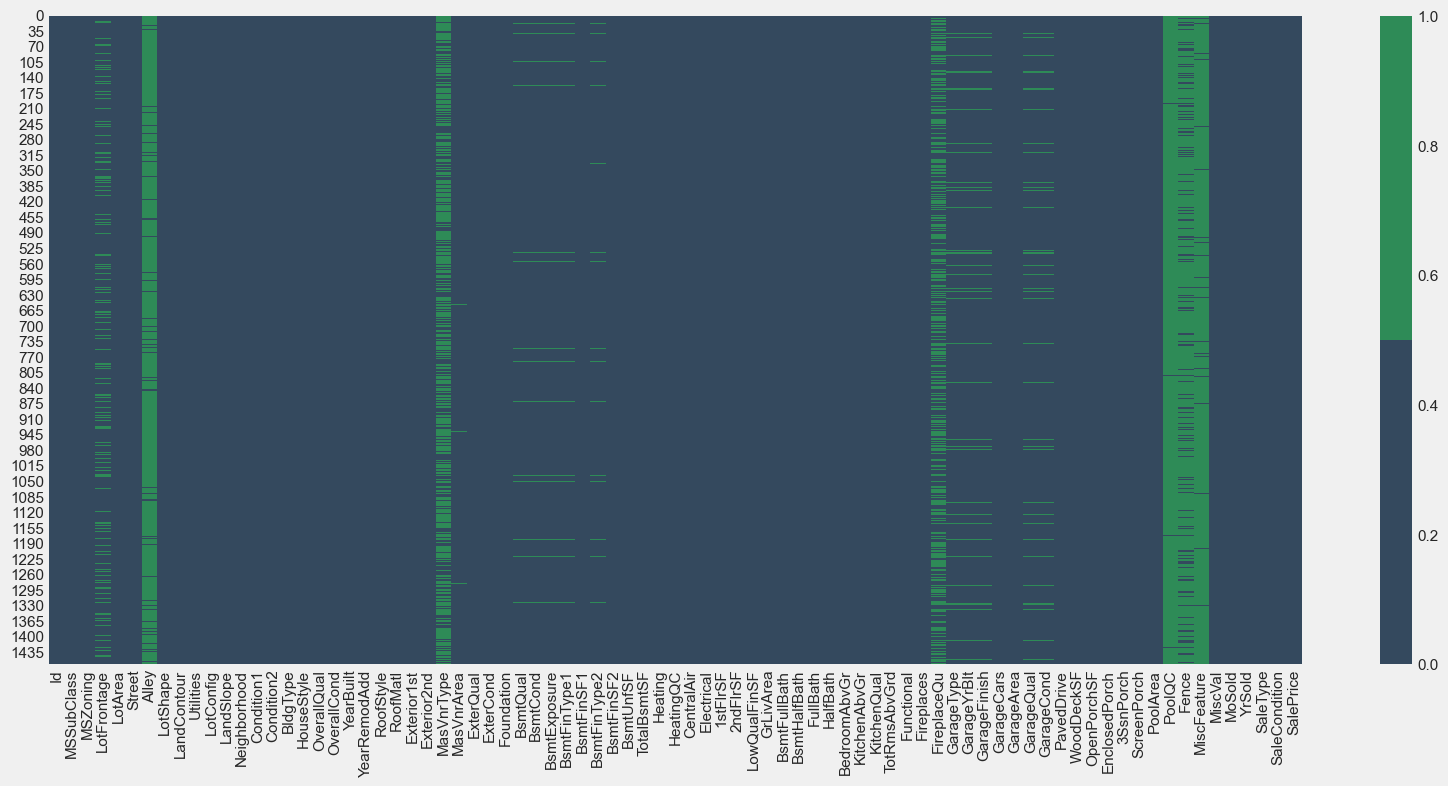

In [17]:
plt.figure(figsize=(18,8))

colours = ['#34495E','seagreen']
sns.heatmap(train_data.isnull(),cmap=sns.color_palette(colours))
plt.savefig('missingValues_HeatMap_plot.png')

In [18]:
columns_above_30 = {
    column: value[1] for column, value in missing_data.items()
    if float(value[1].replace('%', '')) >= 30.0
}
print("columns_above_30 :",columns_above_30)

columns_above_30 : {'Alley': '% 94.0', 'MasVnrType': '% 60.0', 'FireplaceQu': '% 47.0', 'PoolQC': '% 100.0', 'Fence': '% 81.0', 'MiscFeature': '% 96.0'}


In [19]:
# train_data[['MSZoning', 'Street', 'Alley', 'LotShape', 'LandContour', 'Utilities',
#        'LotConfig', 'LandSlope', 'Neighborhood', 'Condition1', 'Condition2',
#        'BldgType', 'HouseStyle', 'RoofStyle', 'RoofMatl', 'Exterior1st',
#        'Exterior2nd', 'MasVnrType', 'ExterQual', 'ExterCond', 'Foundation',
#        'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2',
#        'Heating', 'HeatingQC', 'CentralAir', 'Electrical', 'KitchenQual',
#        'Functional', 'FireplaceQu', 'GarageType', 'GarageFinish', 'GarageQual',
#        'GarageCond', 'PavedDrive', 'PoolQC', 'Fence', 'MiscFeature',
#        'SaleType', 'SaleCondition']]= train_data[['MSZoning', 'Street', 'Alley', 'LotShape', 'LandContour', 'Utilities',
#        'LotConfig', 'LandSlope', 'Neighborhood', 'Condition1', 'Condition2',
#        'BldgType', 'HouseStyle', 'RoofStyle', 'RoofMatl', 'Exterior1st',
#        'Exterior2nd', 'MasVnrType', 'ExterQual', 'ExterCond', 'Foundation',
#        'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2',
#        'Heating', 'HeatingQC', 'CentralAir', 'Electrical', 'KitchenQual',
#        'Functional', 'FireplaceQu', 'GarageType', 'GarageFinish', 'GarageQual',
#        'GarageCond', 'PavedDrive', 'PoolQC', 'Fence', 'MiscFeature',
#        'SaleType', 'SaleCondition']].astype('category')

# Dropping columns
Dropping columns with missing values of 30% and Id column

In [20]:
train_data.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [21]:
#Recheck the missing values
train_data.isnull().values.sum()

7829

In [22]:
train_data=train_data.drop(columns=['Alley','MasVnrType','FireplaceQu','PoolQC','Fence','MiscFeature'])


In [23]:
train_data.isnull().values.sum()

860

{'LotFrontage': [259, '% 18.0'], 'MasVnrArea': [8, '% 1.0'], 'BsmtQual': [37, '% 3.0'], 'BsmtCond': [37, '% 3.0'], 'BsmtExposure': [38, '% 3.0'], 'BsmtFinType1': [37, '% 3.0'], 'BsmtFinType2': [38, '% 3.0'], 'Electrical': [1, '% 0.0'], 'GarageType': [81, '% 6.0'], 'GarageYrBlt': [81, '% 6.0'], 'GarageFinish': [81, '% 6.0'], 'GarageQual': [81, '% 6.0'], 'GarageCond': [81, '% 6.0']}


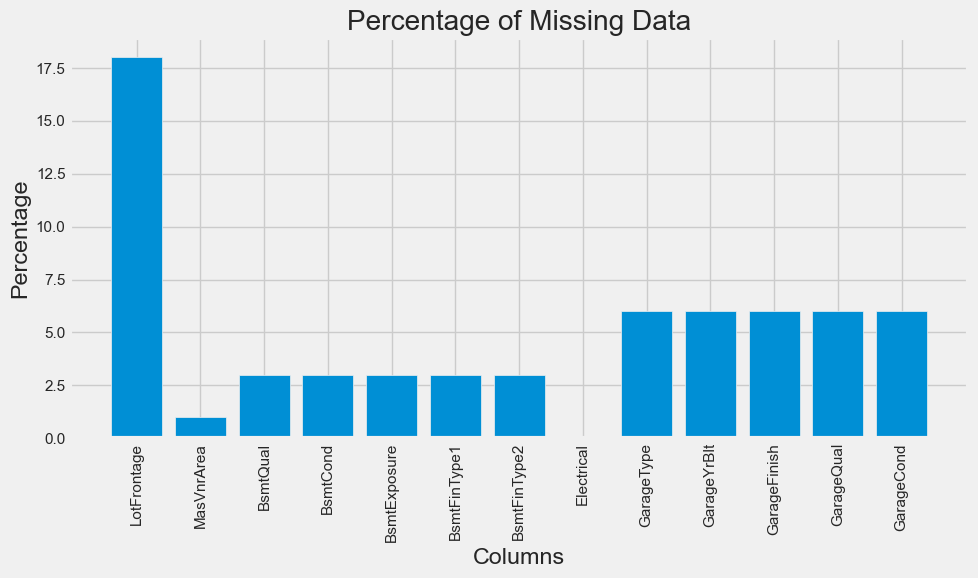

In [24]:
 # calculate missing values
missing_data2 = {col: [train_data[col].isnull().sum(), f'% {np.round(np.mean(train_data[col].isnull()*100))}']
                for col in train_data.columns if train_data[col].isnull().any()}
print(missing_data2)

# Extracting column names and corresponding missing percentages
columns = list(missing_data2.keys())
percentages = [float(value[1].strip('% ')) for value in missing_data2.values()]

# Creating the plot
plt.figure(figsize=(10, 6))
plt.bar(columns, percentages)

# Customizing the plot
plt.title('Percentage of Missing Data')
plt.xlabel('Columns')
plt.ylabel('Percentage')
plt.xticks(rotation=90)

# Displaying the plot
plt.tight_layout()
plt.show()

In [25]:
for i in missing_data2:
    print(i)

LotFrontage
MasVnrArea
BsmtQual
BsmtCond
BsmtExposure
BsmtFinType1
BsmtFinType2
Electrical
GarageType
GarageYrBlt
GarageFinish
GarageQual
GarageCond


In [26]:
train_data["GarageCars"].unique()

array([2, 3, 1, 0, 4])

## Mean Imputation
'LotFrontage','MasVnrArea','BsmtQual','BsmtCond','BsmtExposure','BsmtFinType1',
'BsmtFinType2','Electrical','GarageType','GarageYrBlt','GarageFinish','GarageQual','GarageCond'

In [27]:
train_data[["LotFrontage","MasVnrArea"]] = train_data[["LotFrontage","MasVnrArea"]].fillna(train_data[["LotFrontage","MasVnrArea"]].mean())


### Mode Imputattion

In [28]:
# Mode Imputattion
# List of categorical columns where you want to impute missing values
categorical_columns = ['BsmtQual','BsmtCond','BsmtExposure','BsmtFinType1',
'BsmtFinType2','Electrical','GarageType','GarageFinish','GarageQual','GarageCond']

# Impute missing values in each column with its respective mode
for column in categorical_columns:
    train_data[column].fillna(train_data[column].mode()[0], inplace=True)


In [29]:
# Convert GarageYrBlt to datetime

In [30]:
train_data['GarageCars']

0       2
1       2
2       2
3       3
4       3
       ..
1455    2
1456    2
1457    1
1458    1
1459    1
Name: GarageCars, Length: 1460, dtype: int64

In [31]:
train_data["GarageYrBlt"].unique()

array([2003., 1976., 2001., 1998., 2000., 1993., 2004., 1973., 1931.,
       1939., 1965., 2005., 1962., 2006., 1960., 1991., 1970., 1967.,
       1958., 1930., 2002., 1968., 2007., 2008., 1957., 1920., 1966.,
       1959., 1995., 1954., 1953.,   nan, 1983., 1977., 1997., 1985.,
       1963., 1981., 1964., 1999., 1935., 1990., 1945., 1987., 1989.,
       1915., 1956., 1948., 1974., 2009., 1950., 1961., 1921., 1900.,
       1979., 1951., 1969., 1936., 1975., 1971., 1923., 1984., 1926.,
       1955., 1986., 1988., 1916., 1932., 1972., 1918., 1980., 1924.,
       1996., 1940., 1949., 1994., 1910., 1978., 1982., 1992., 1925.,
       1941., 2010., 1927., 1947., 1937., 1942., 1938., 1952., 1928.,
       1922., 1934., 1906., 1914., 1946., 1908., 1929., 1933.])

In [32]:
# Missing data imputation using the mode
train_data["GarageYrBlt"].fillna(train_data["GarageYrBlt"].mode()[0], inplace=True)


In [33]:
#Recheck the missing values
train_data.isnull().values.sum()

0

In [34]:
train_data.shape

(1460, 75)

In [35]:
# Drop Id column as it is not important
train_data=train_data.drop(columns = ['Id'])

In [36]:
train_data.shape

(1460, 74)

# Handling Outliers

In [37]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 74 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   MSSubClass     1460 non-null   int64  
 1   MSZoning       1460 non-null   object 
 2   LotFrontage    1460 non-null   float64
 3   LotArea        1460 non-null   int64  
 4   Street         1460 non-null   object 
 5   LotShape       1460 non-null   object 
 6   LandContour    1460 non-null   object 
 7   Utilities      1460 non-null   object 
 8   LotConfig      1460 non-null   object 
 9   LandSlope      1460 non-null   object 
 10  Neighborhood   1460 non-null   object 
 11  Condition1     1460 non-null   object 
 12  Condition2     1460 non-null   object 
 13  BldgType       1460 non-null   object 
 14  HouseStyle     1460 non-null   object 
 15  OverallQual    1460 non-null   int64  
 16  OverallCond    1460 non-null   int64  
 17  YearBuilt      1460 non-null   int64  
 18  YearRemo

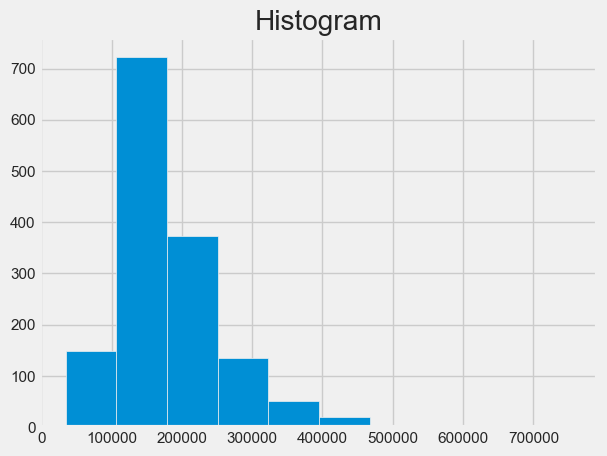

In [38]:
plt.hist(train_data['SalePrice'])
 
plt.title("Histogram")
 
# Adding the legends
plt.show()

In [39]:
train_data['SalePrice']

0       208500
1       181500
2       223500
3       140000
4       250000
         ...  
1455    175000
1456    210000
1457    266500
1458    142125
1459    147500
Name: SalePrice, Length: 1460, dtype: int64

In [40]:
train_data.shape

(1460, 74)

In [41]:
#Checking the total number of categorical and numerical columns
cat_cols2=train_data.select_dtypes(include=['object']).columns
num_cols2 = train_data.select_dtypes(include=np.number).columns.tolist()
#categorical
print("Categorical Variables:")
print(cat_cols2)
print("sum of cat_variables:",len(cat_cols2))
#numerical
print("Numerical Variables:")
print(num_cols2)
print("sum of numerical_variables:",len(num_cols2))

Categorical Variables:
Index(['MSZoning', 'Street', 'LotShape', 'LandContour', 'Utilities',
       'LotConfig', 'LandSlope', 'Neighborhood', 'Condition1', 'Condition2',
       'BldgType', 'HouseStyle', 'RoofStyle', 'RoofMatl', 'Exterior1st',
       'Exterior2nd', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual',
       'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2', 'Heating',
       'HeatingQC', 'CentralAir', 'Electrical', 'KitchenQual', 'Functional',
       'GarageType', 'GarageFinish', 'GarageQual', 'GarageCond', 'PavedDrive',
       'SaleType', 'SaleCondition'],
      dtype='object')
sum of cat_variables: 37
Numerical Variables:
['MSSubClass', 'LotFrontage', 'LotArea', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd', 'MasVnrArea', 'BsmtFinSF1', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', '1stFlrSF', '2ndFlrSF', 'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'TotRmsAbvGrd', 'Fireplaces', 'Gar

MSSubClass
Skew : 1.41


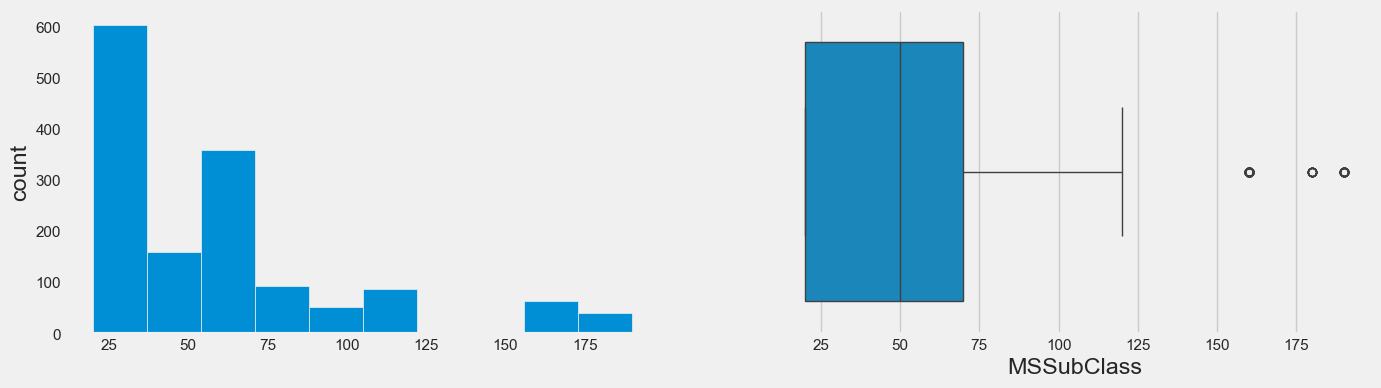

LotFrontage
Skew : 2.38


<Figure size 640x480 with 0 Axes>

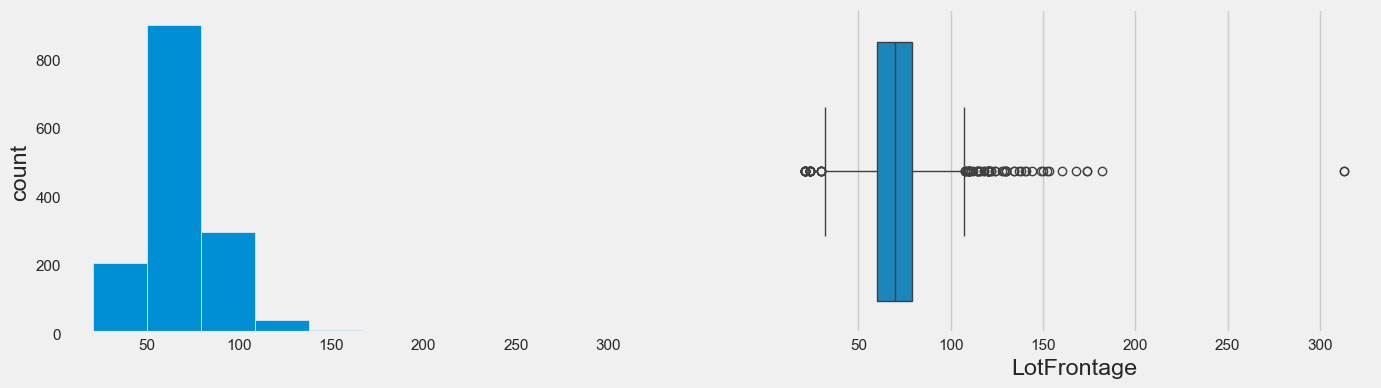

LotArea
Skew : 12.21


<Figure size 640x480 with 0 Axes>

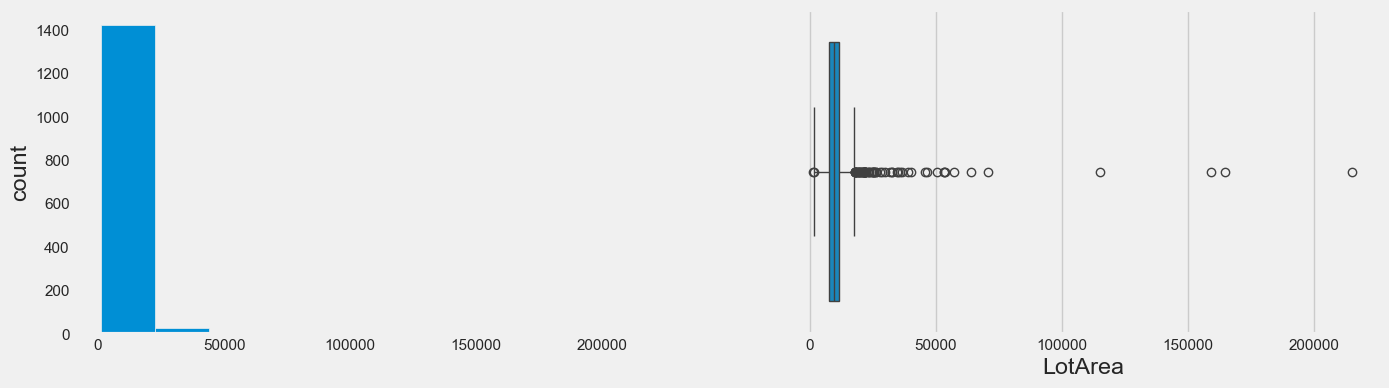

OverallQual
Skew : 0.22


<Figure size 640x480 with 0 Axes>

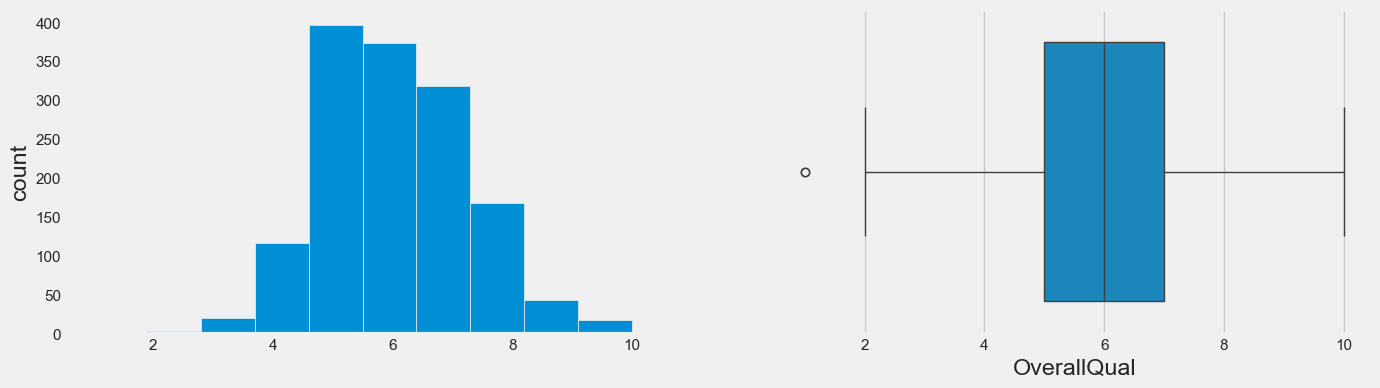

OverallCond
Skew : 0.69


<Figure size 640x480 with 0 Axes>

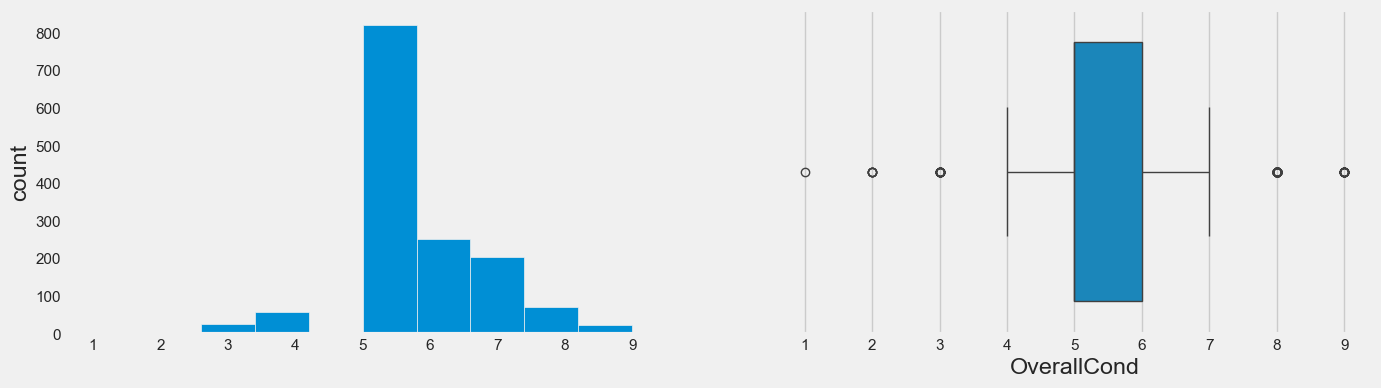

YearBuilt
Skew : -0.61


<Figure size 640x480 with 0 Axes>

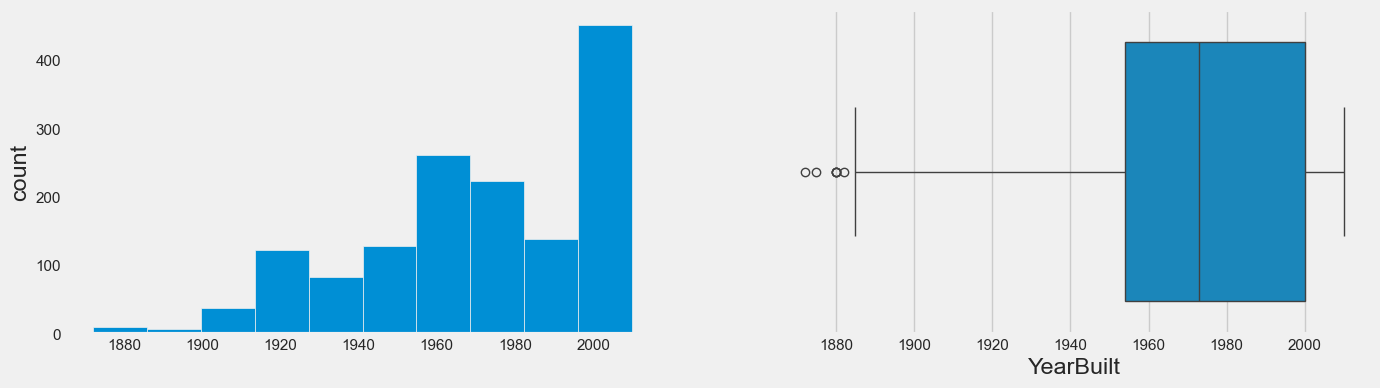

YearRemodAdd
Skew : -0.5


<Figure size 640x480 with 0 Axes>

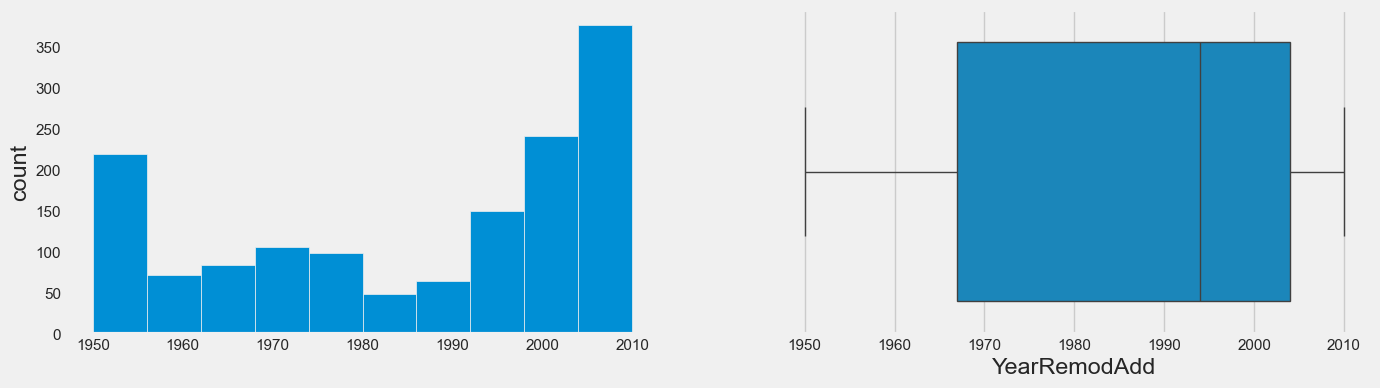

MasVnrArea
Skew : 2.68


<Figure size 640x480 with 0 Axes>

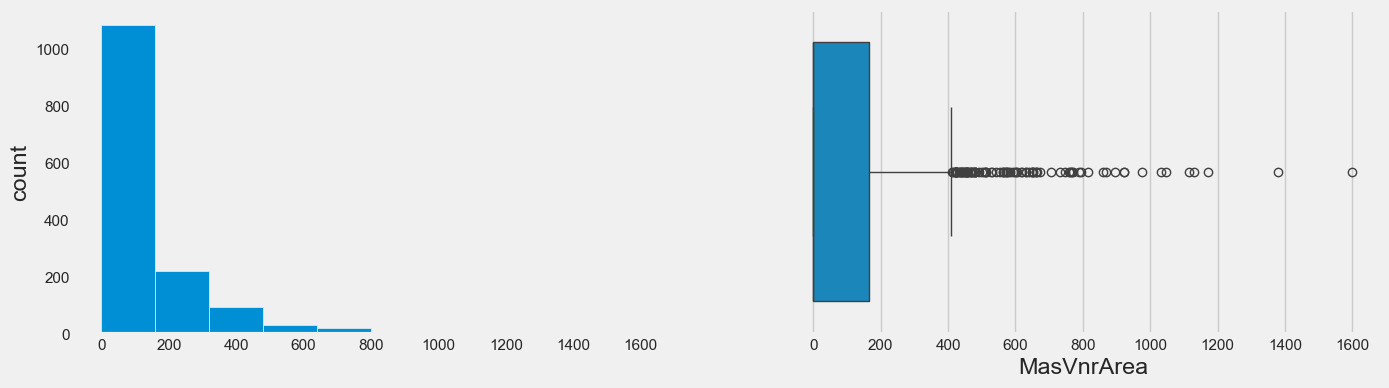

BsmtFinSF1
Skew : 1.69


<Figure size 640x480 with 0 Axes>

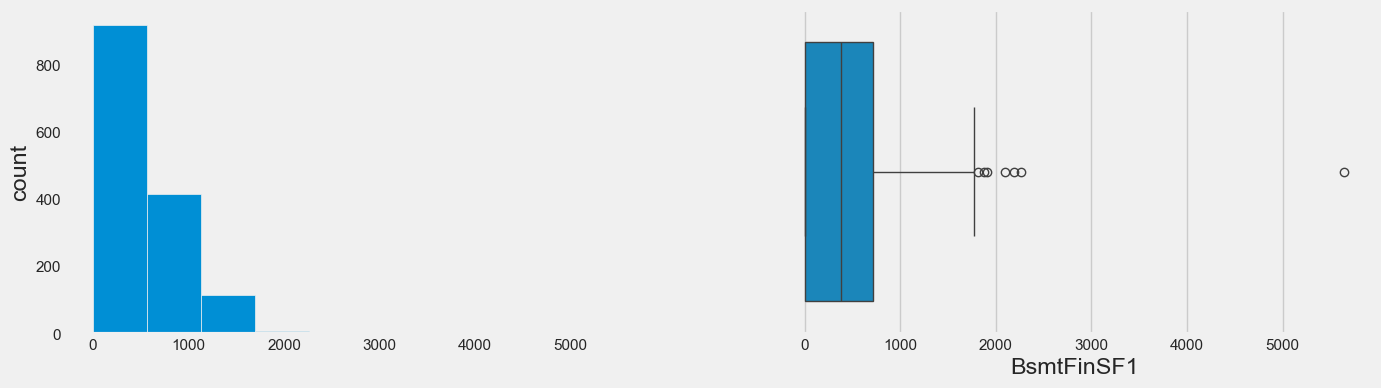

BsmtFinSF2
Skew : 4.26


<Figure size 640x480 with 0 Axes>

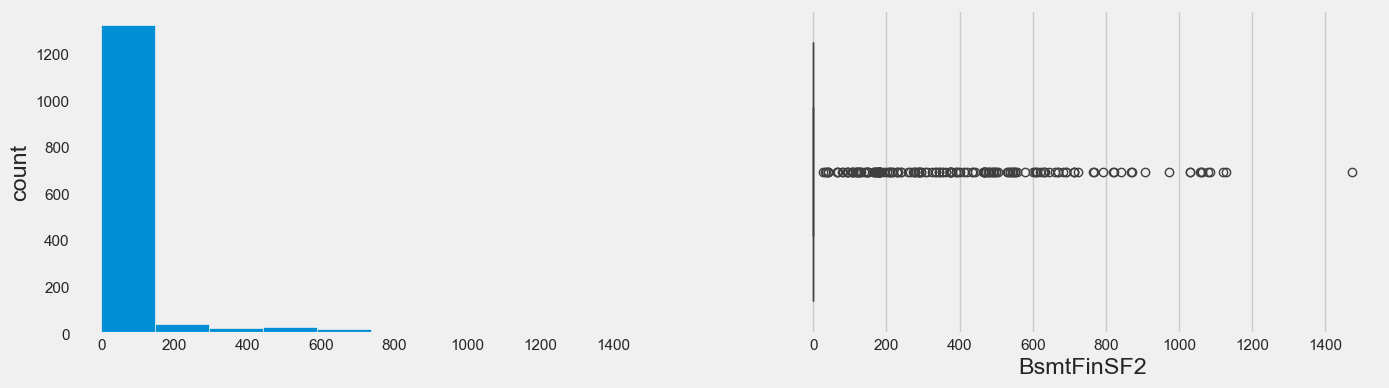

BsmtUnfSF
Skew : 0.92


<Figure size 640x480 with 0 Axes>

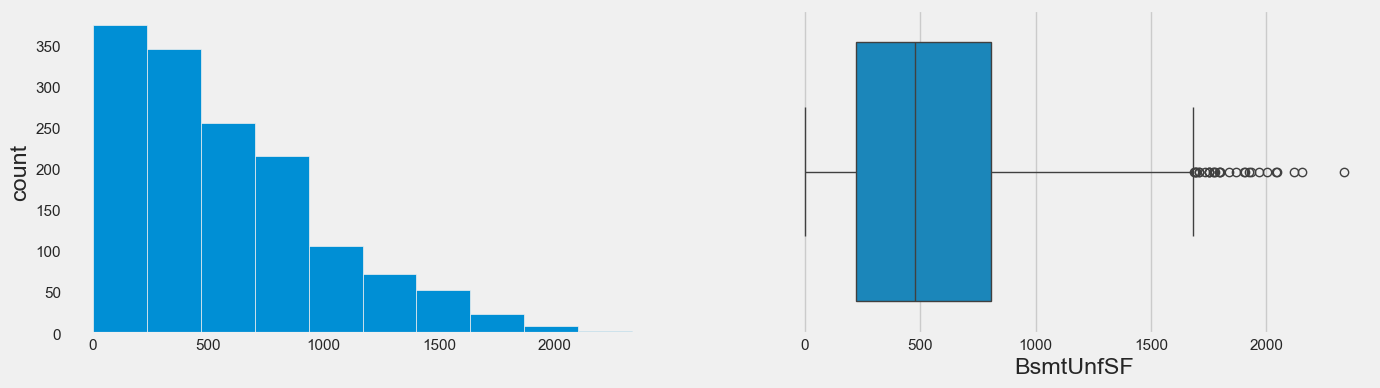

TotalBsmtSF
Skew : 1.52


<Figure size 640x480 with 0 Axes>

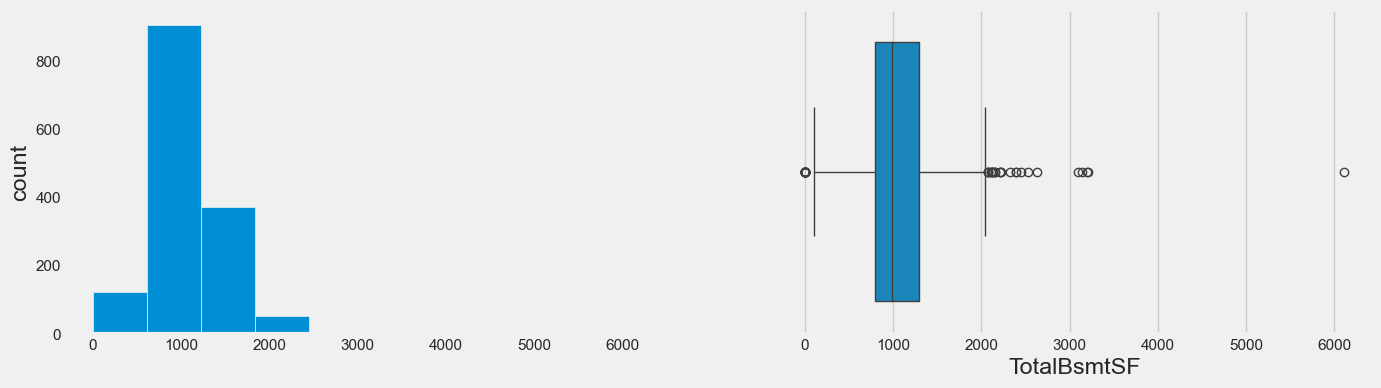

1stFlrSF
Skew : 1.38


<Figure size 640x480 with 0 Axes>

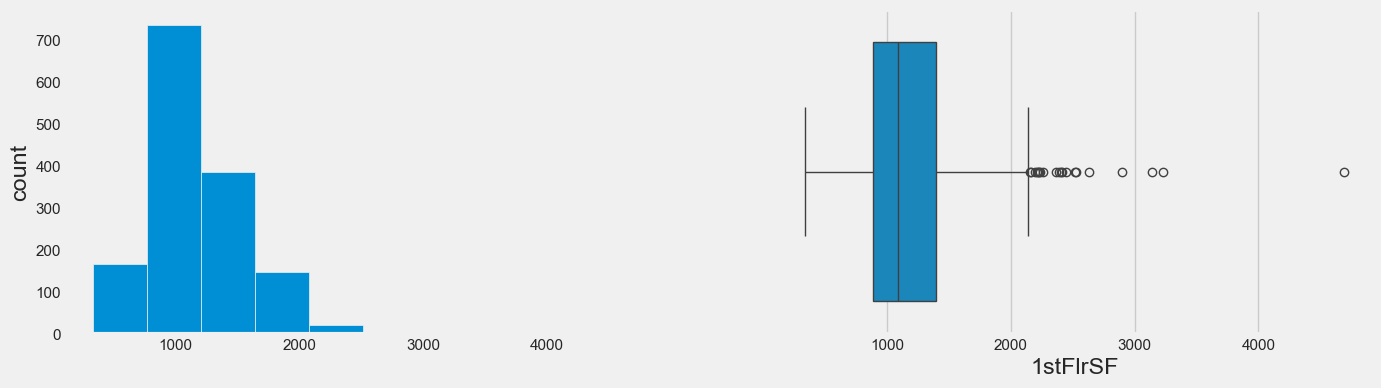

2ndFlrSF
Skew : 0.81


<Figure size 640x480 with 0 Axes>

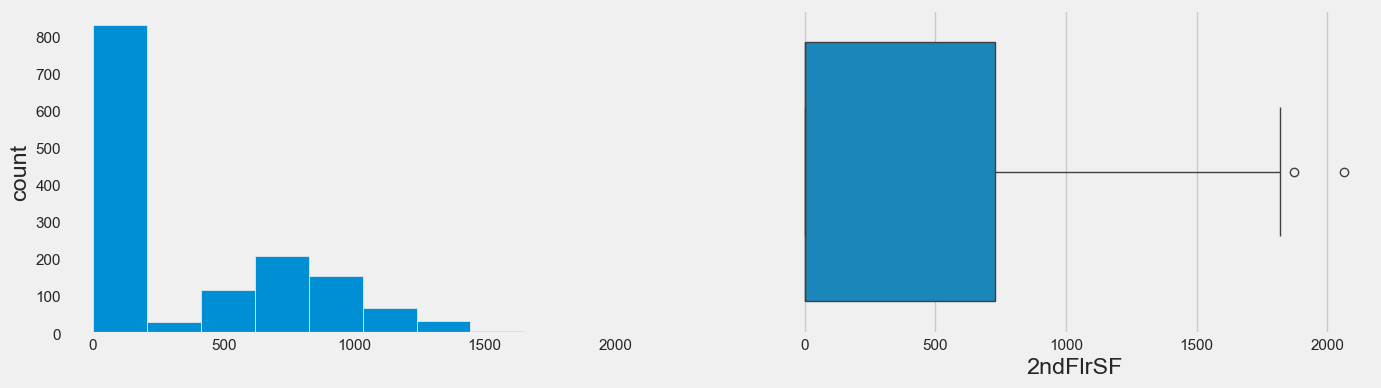

LowQualFinSF
Skew : 9.01


<Figure size 640x480 with 0 Axes>

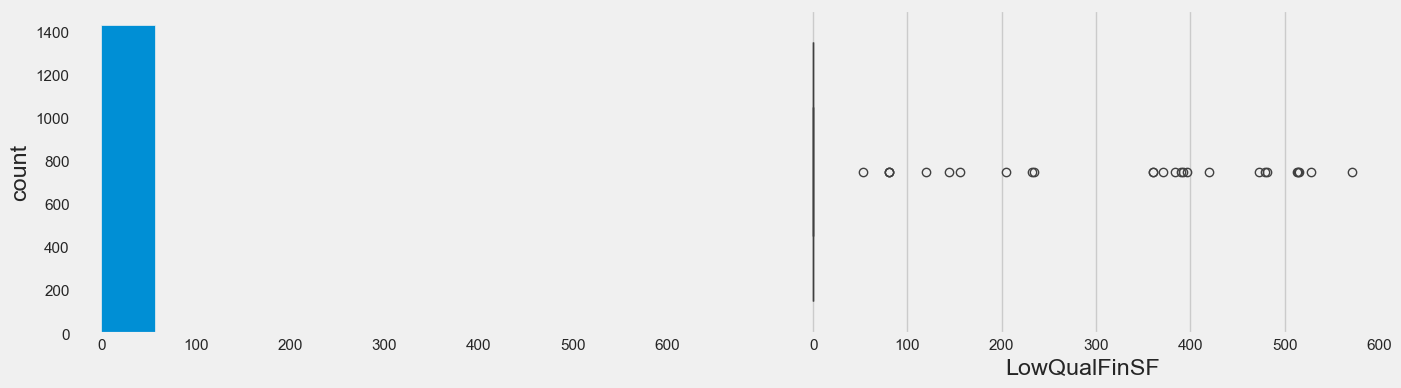

GrLivArea
Skew : 1.37


<Figure size 640x480 with 0 Axes>

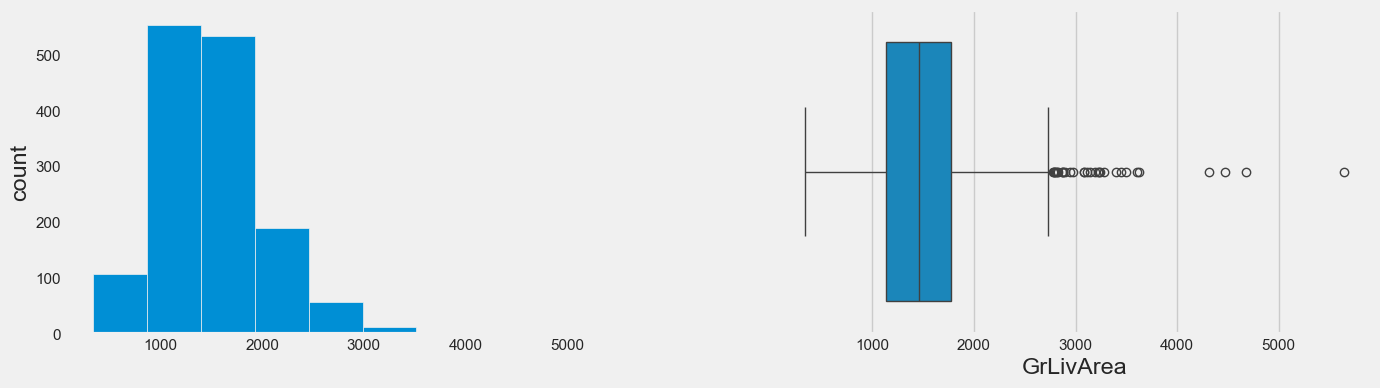

BsmtFullBath
Skew : 0.6


<Figure size 640x480 with 0 Axes>

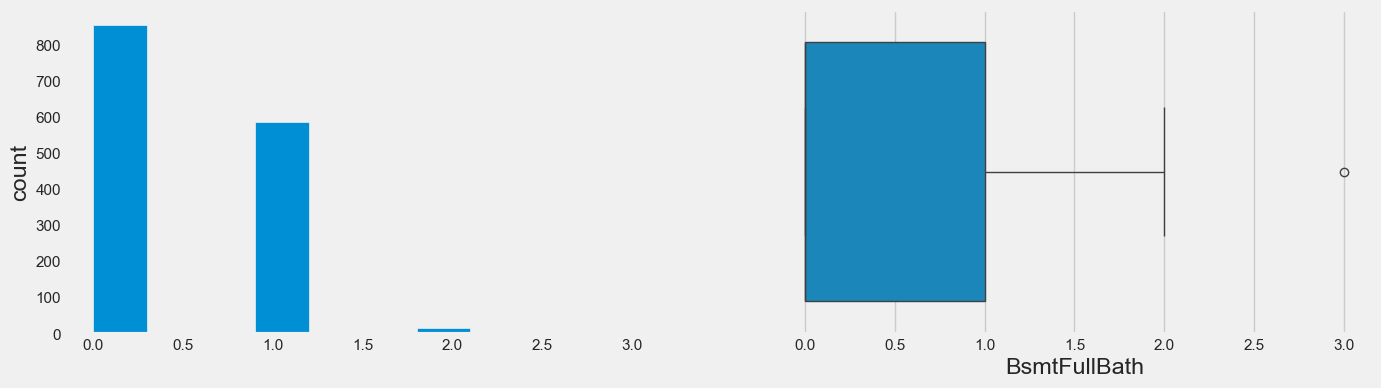

BsmtHalfBath
Skew : 4.1


<Figure size 640x480 with 0 Axes>

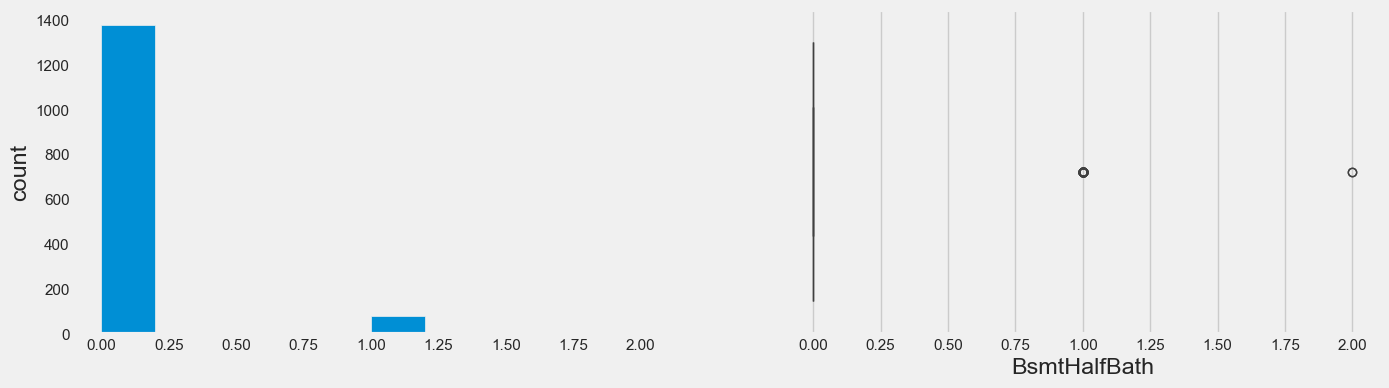

FullBath
Skew : 0.04


<Figure size 640x480 with 0 Axes>

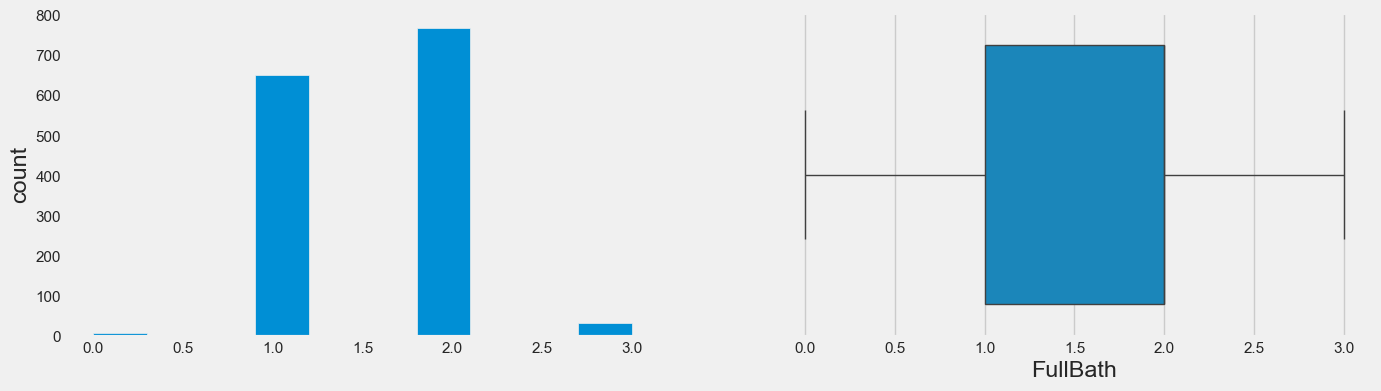

HalfBath
Skew : 0.68


<Figure size 640x480 with 0 Axes>

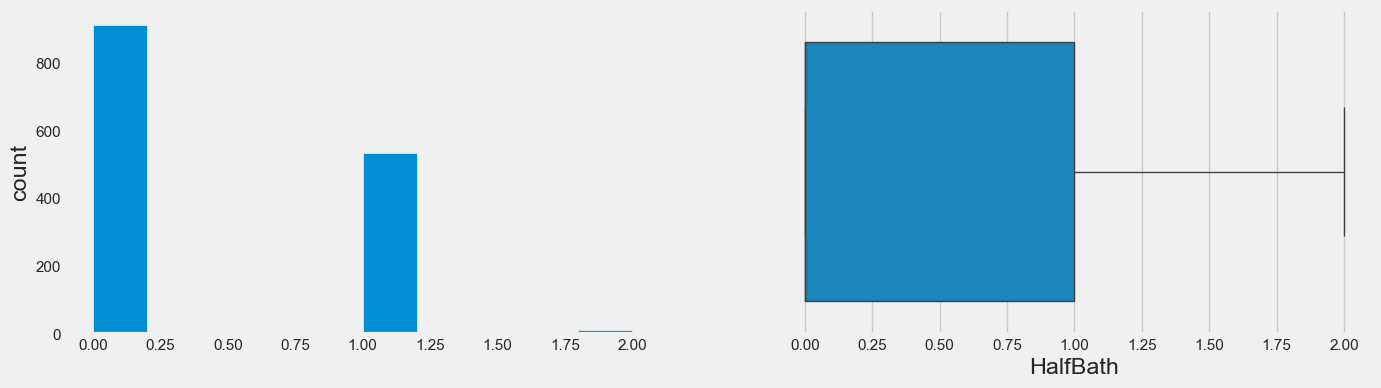

BedroomAbvGr
Skew : 0.21


<Figure size 640x480 with 0 Axes>

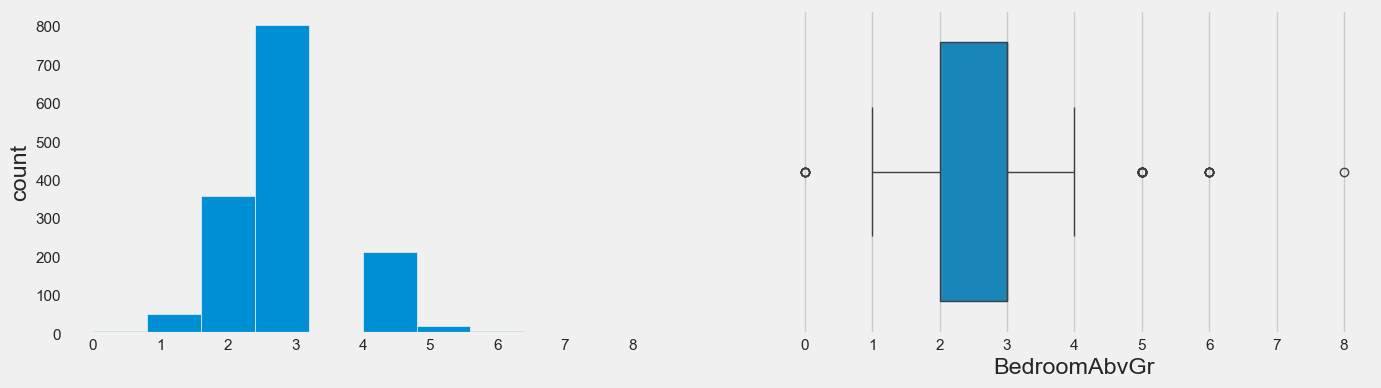

KitchenAbvGr
Skew : 4.49


<Figure size 640x480 with 0 Axes>

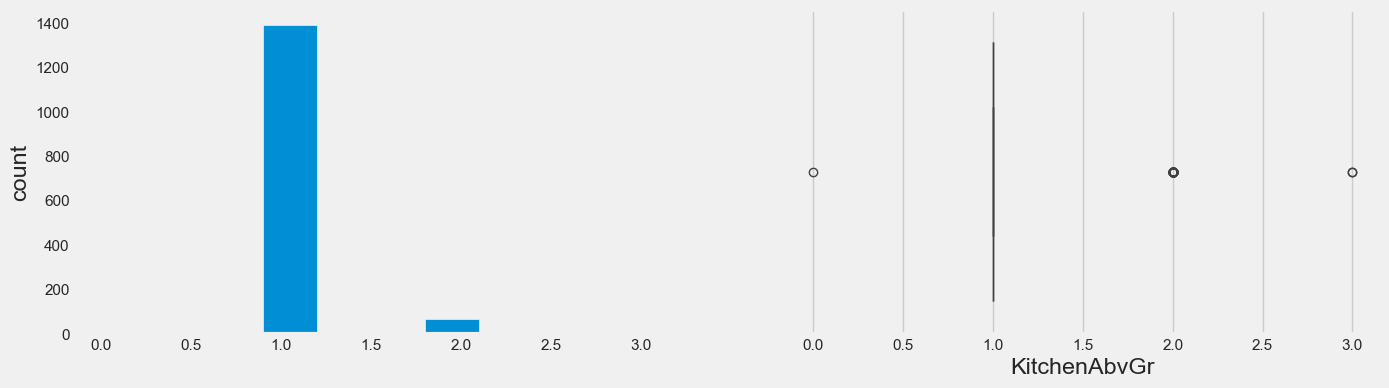

TotRmsAbvGrd
Skew : 0.68


<Figure size 640x480 with 0 Axes>

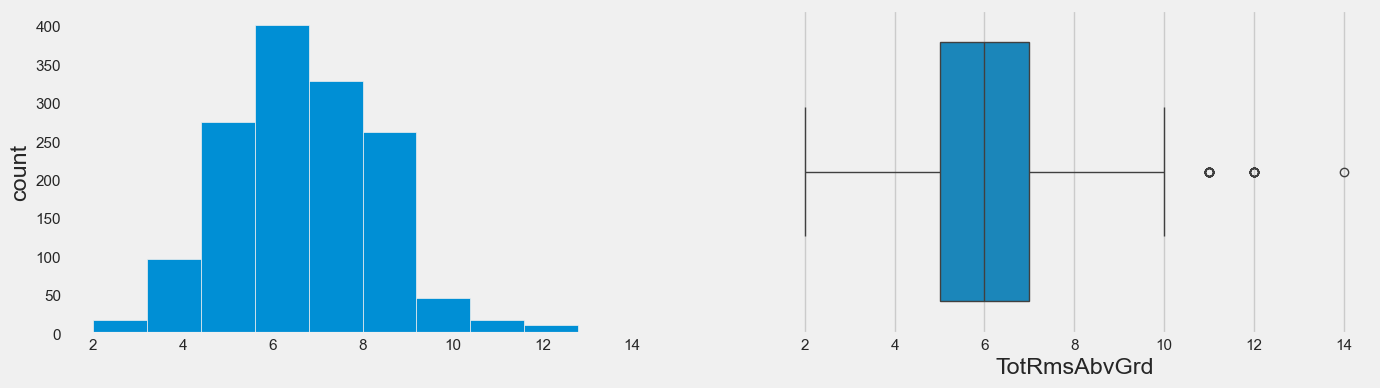

Fireplaces
Skew : 0.65


<Figure size 640x480 with 0 Axes>

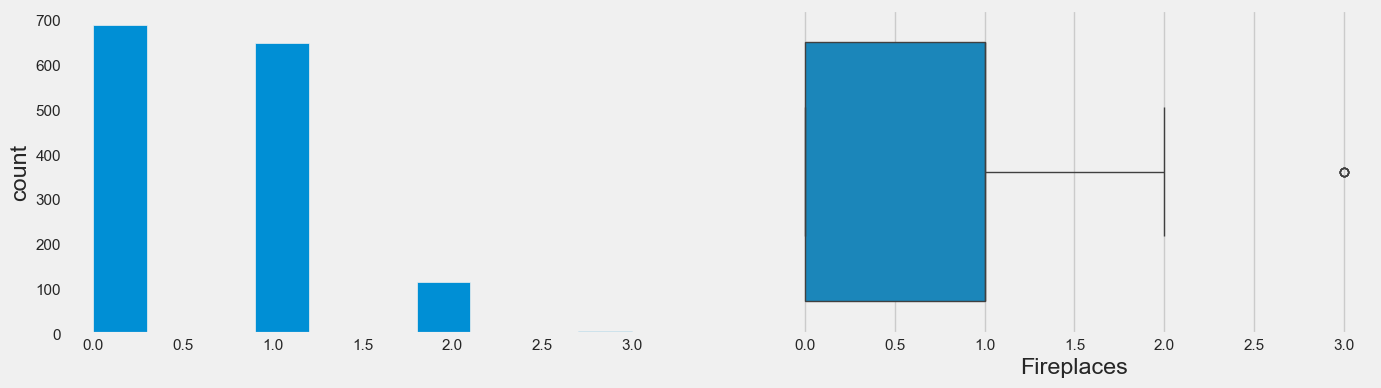

GarageYrBlt
Skew : -0.72


<Figure size 640x480 with 0 Axes>

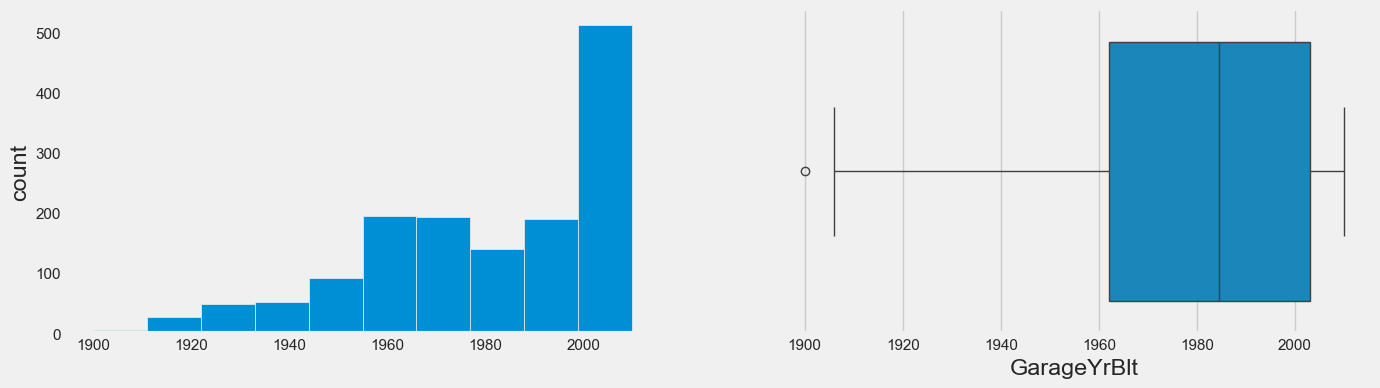

GarageCars
Skew : -0.34


<Figure size 640x480 with 0 Axes>

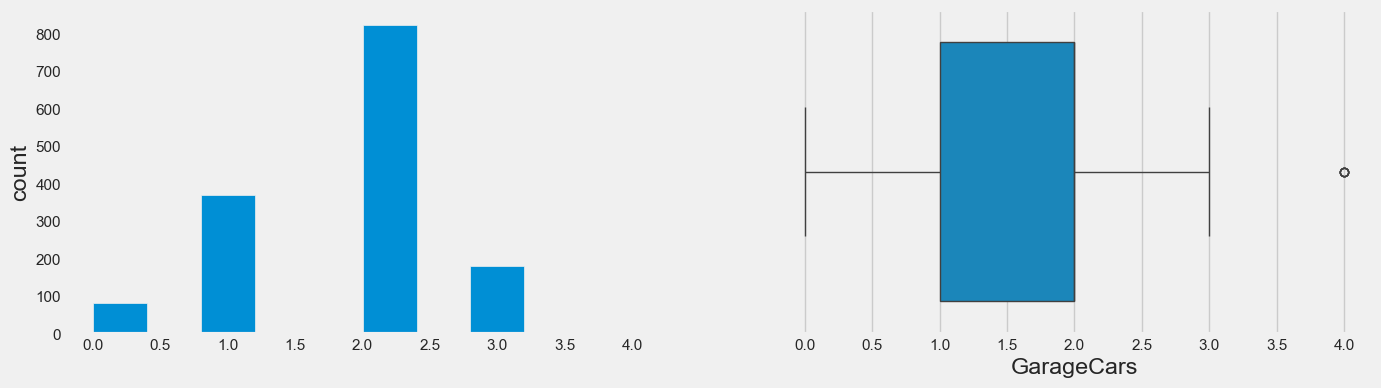

GarageArea
Skew : 0.18


<Figure size 640x480 with 0 Axes>

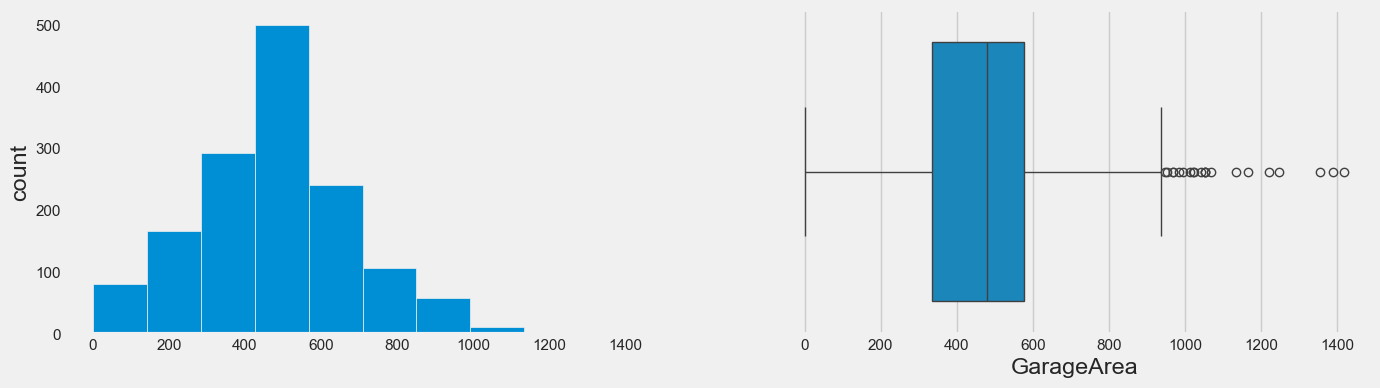

WoodDeckSF
Skew : 1.54


<Figure size 640x480 with 0 Axes>

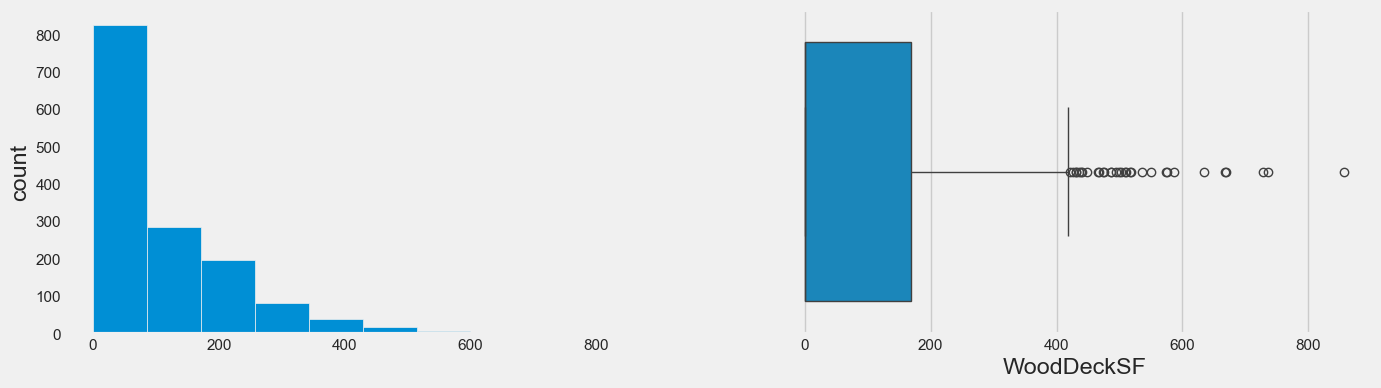

OpenPorchSF
Skew : 2.36


<Figure size 640x480 with 0 Axes>

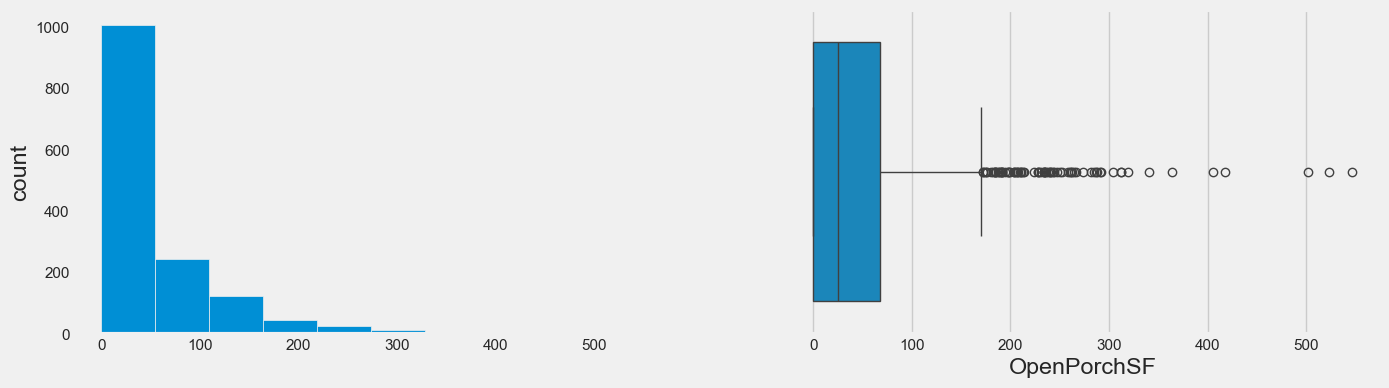

EnclosedPorch
Skew : 3.09


<Figure size 640x480 with 0 Axes>

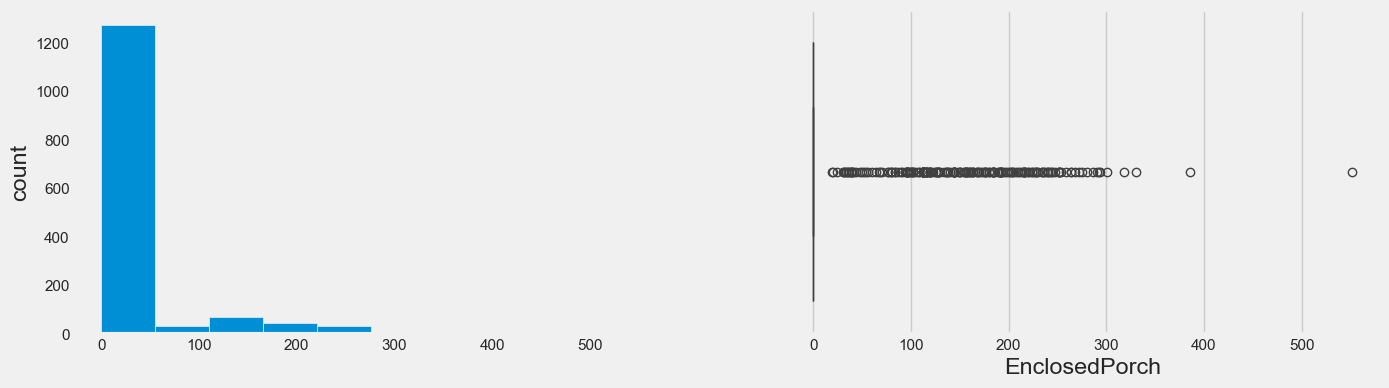

3SsnPorch
Skew : 10.3


<Figure size 640x480 with 0 Axes>

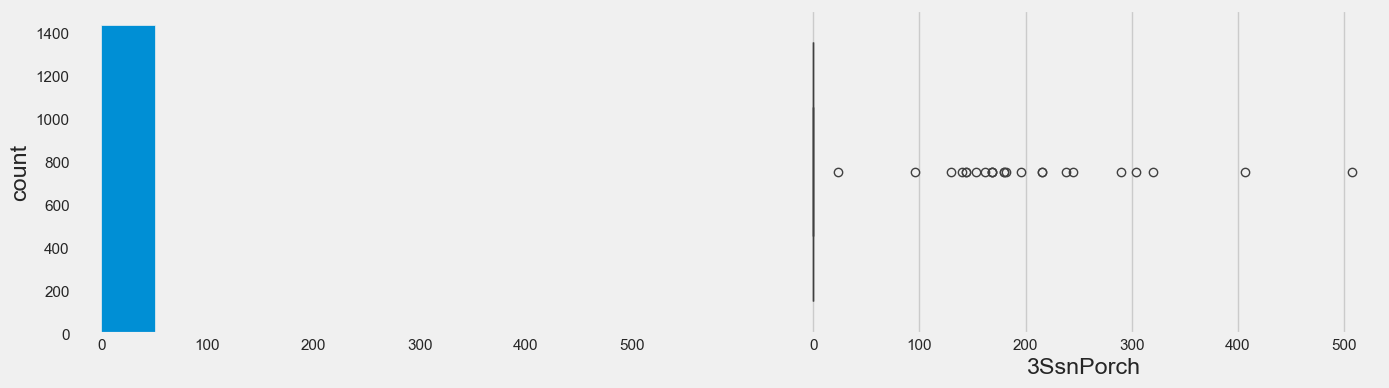

ScreenPorch
Skew : 4.12


<Figure size 640x480 with 0 Axes>

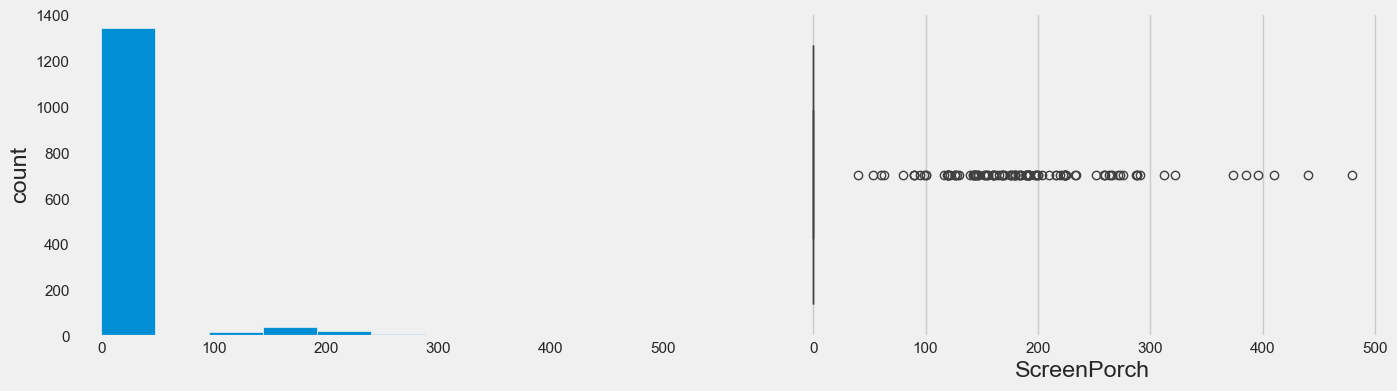

PoolArea
Skew : 14.83


<Figure size 640x480 with 0 Axes>

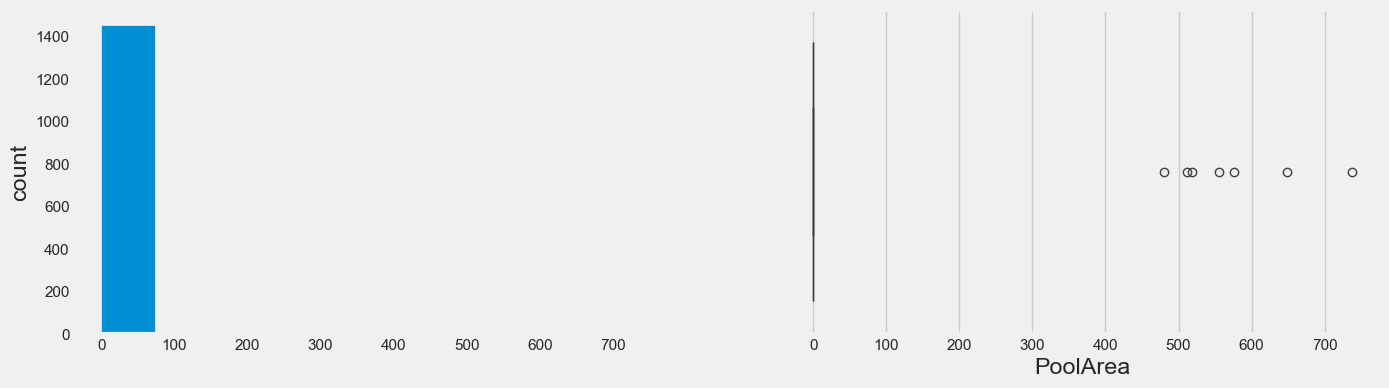

MiscVal
Skew : 24.48


<Figure size 640x480 with 0 Axes>

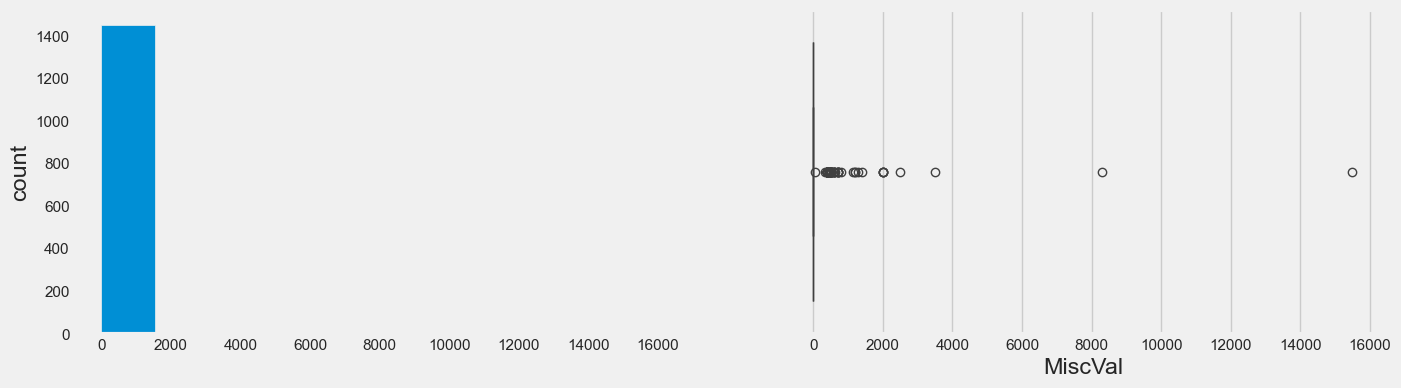

MoSold
Skew : 0.21


<Figure size 640x480 with 0 Axes>

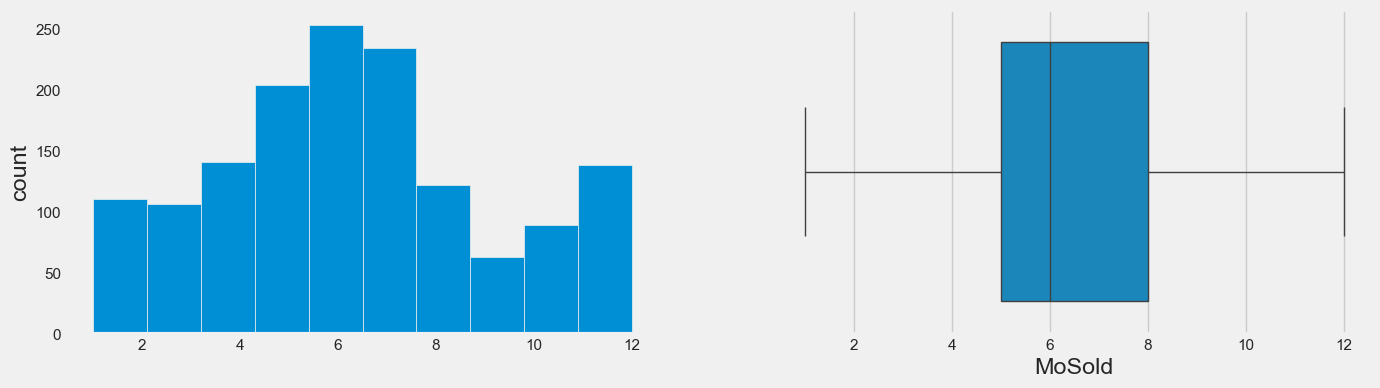

YrSold
Skew : 0.1


<Figure size 640x480 with 0 Axes>

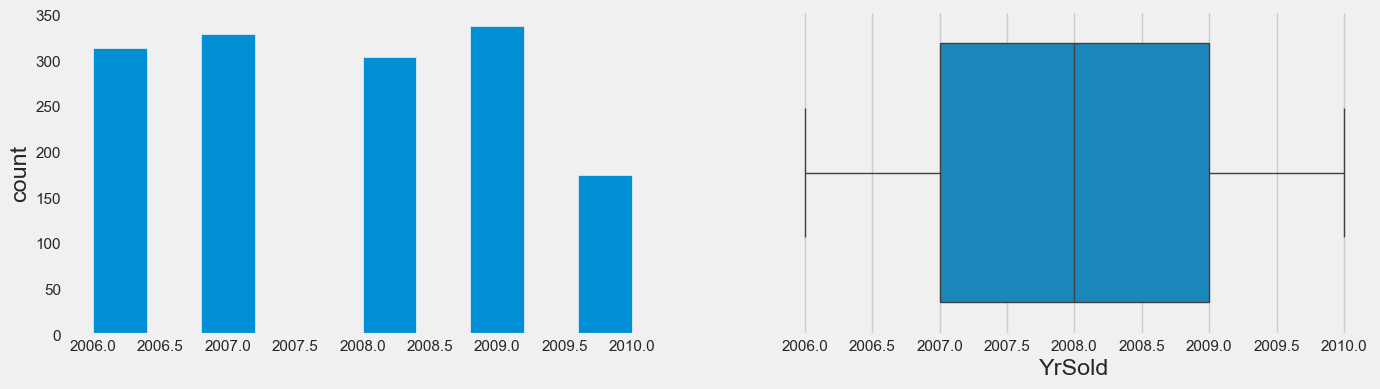

SalePrice
Skew : 1.88


<Figure size 640x480 with 0 Axes>

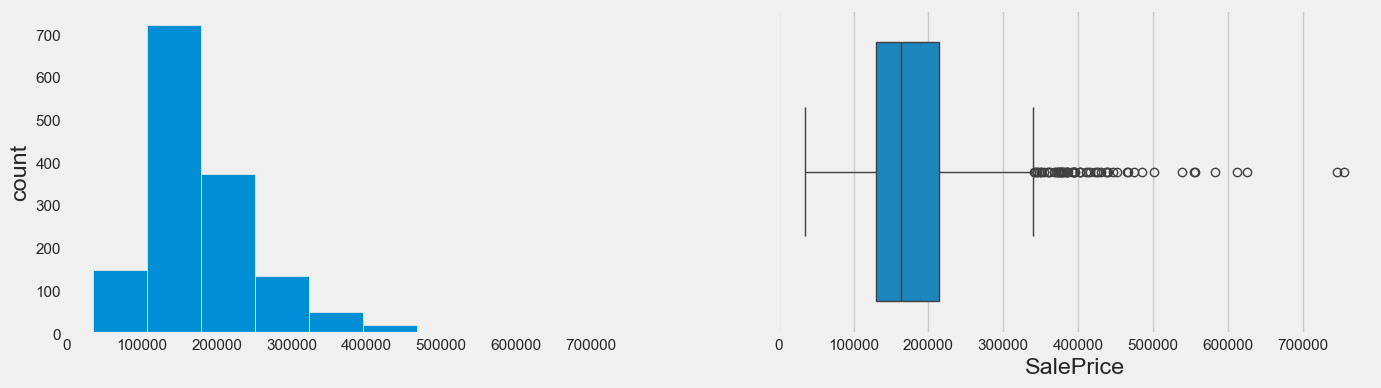

<Figure size 640x480 with 0 Axes>

In [42]:
for col in num_cols2:
    print(col)
    print('Skew :', round(train_data[col].skew(), 2))
    plt.figure(figsize = (15, 4))
    plt.subplot(1, 2, 1)
    train_data[col].hist(grid=False)
    plt.ylabel('count')
    plt.subplot(1, 2, 2)
    sns.boxplot(x=train_data[col])
    plt.show()
    plt.savefig('box_plot.png')

# Handling Outliers


In [43]:
#Install feature-engine
#!pip install feature-engine

In [44]:
from feature_engine.outliers import Winsorizer

MSSubClass


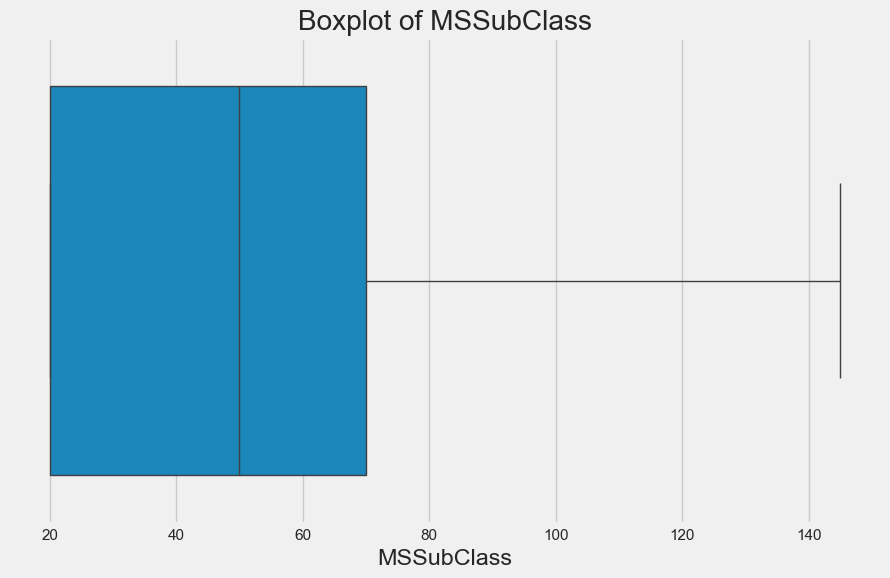

LotFrontage


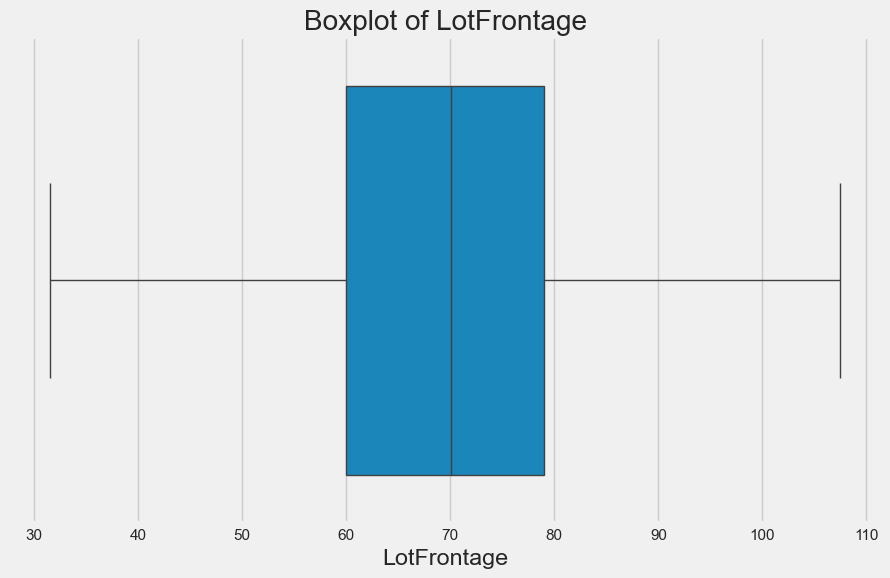

LotArea


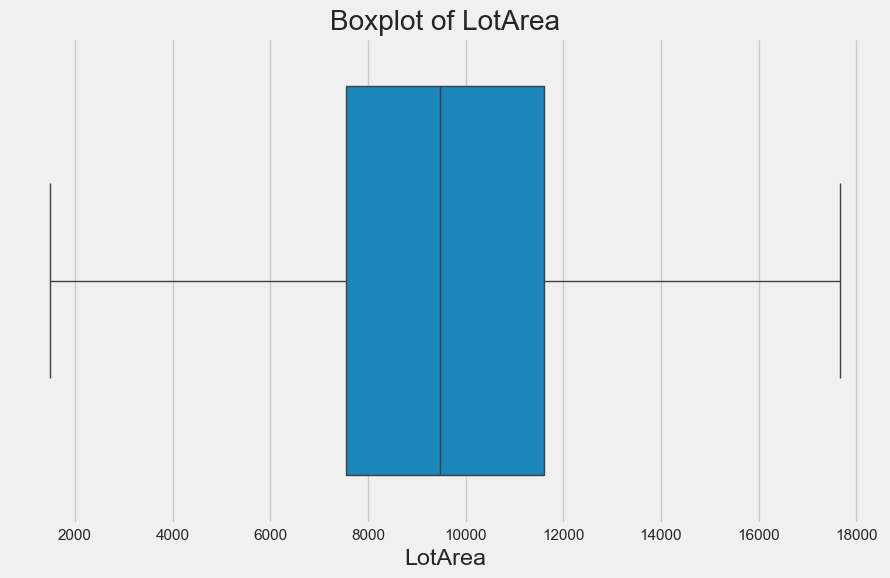

OverallQual


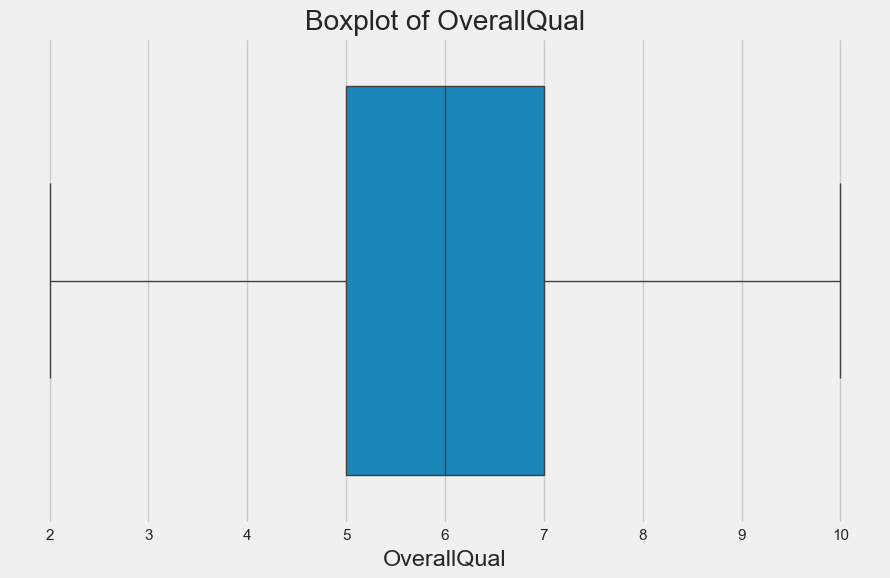

OverallCond


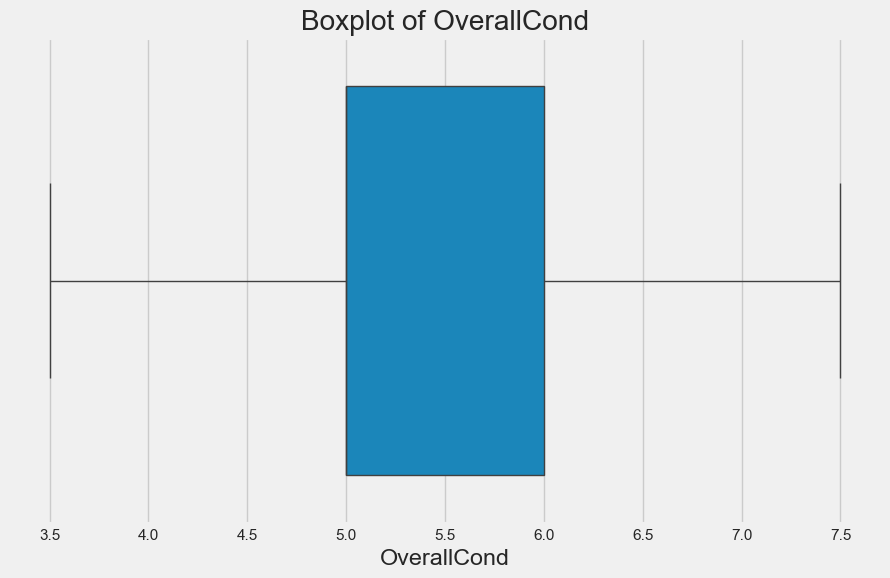

YearBuilt


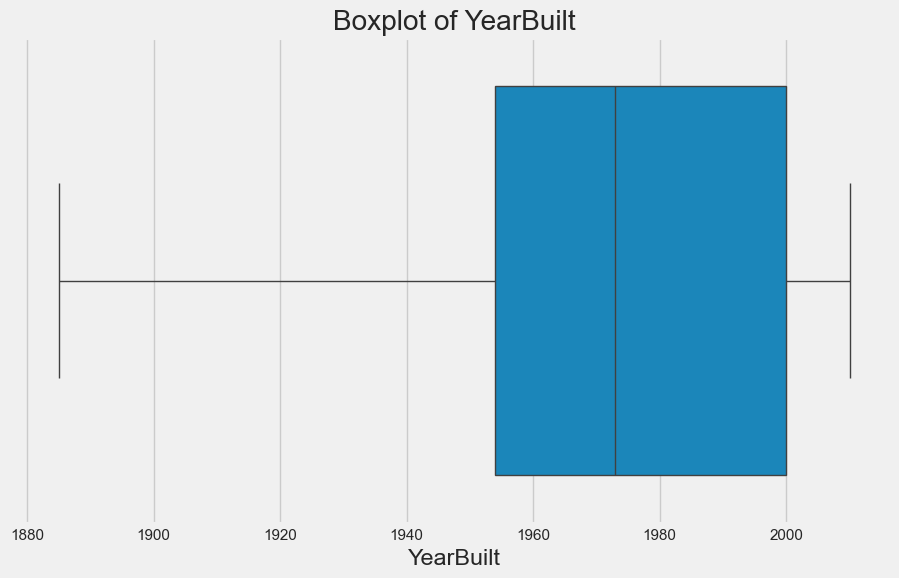

MasVnrArea


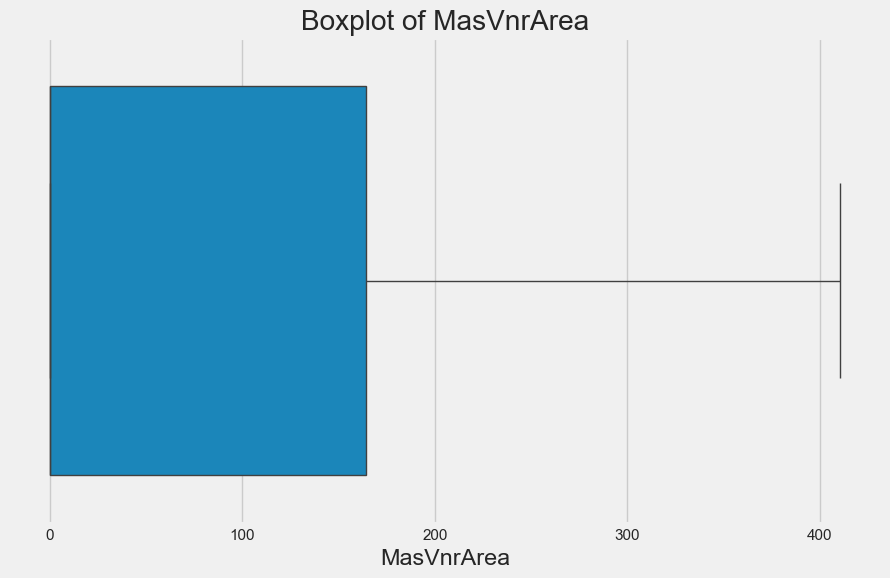

BsmtFinSF1


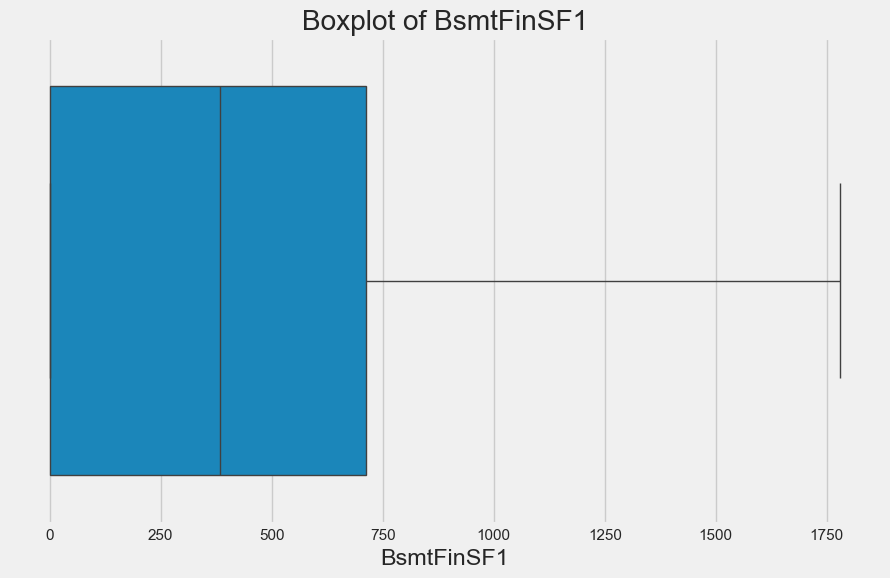

BsmtUnfSF


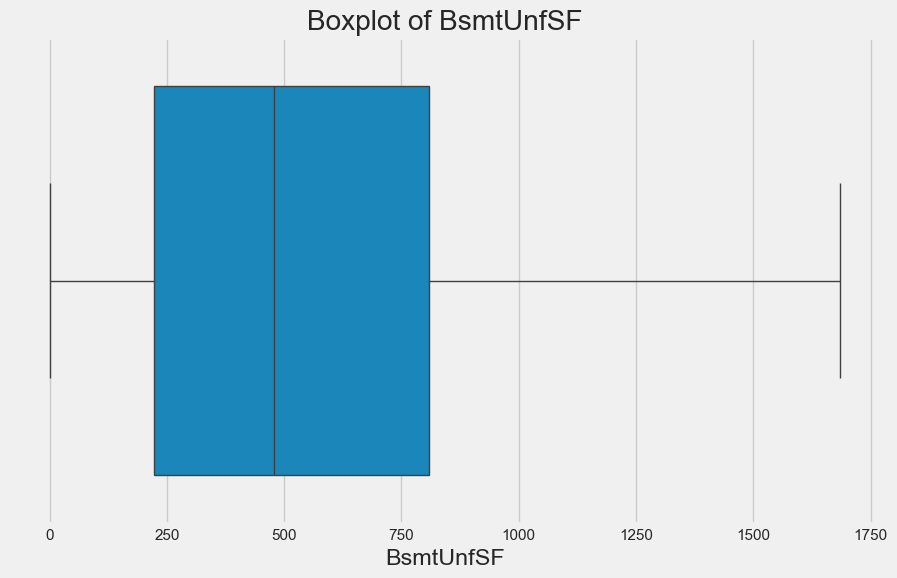

TotalBsmtSF


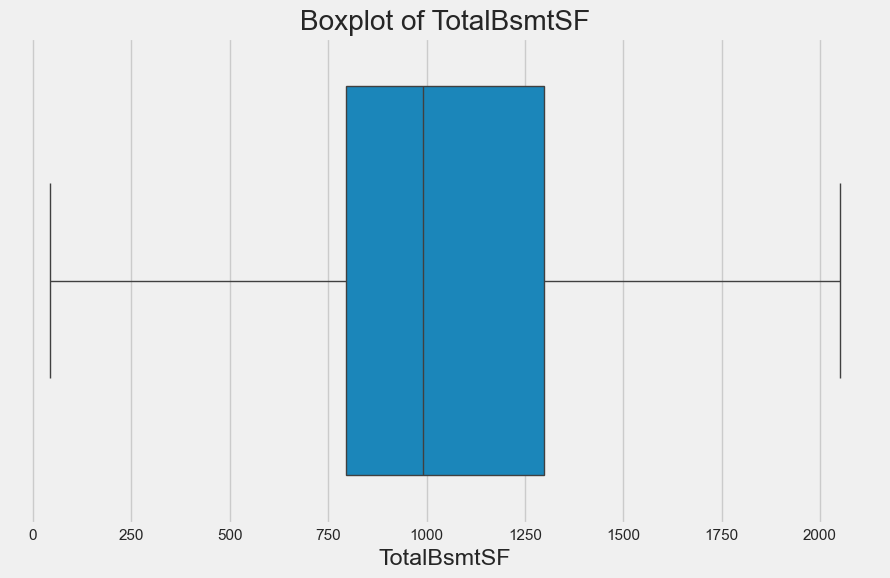

1stFlrSF


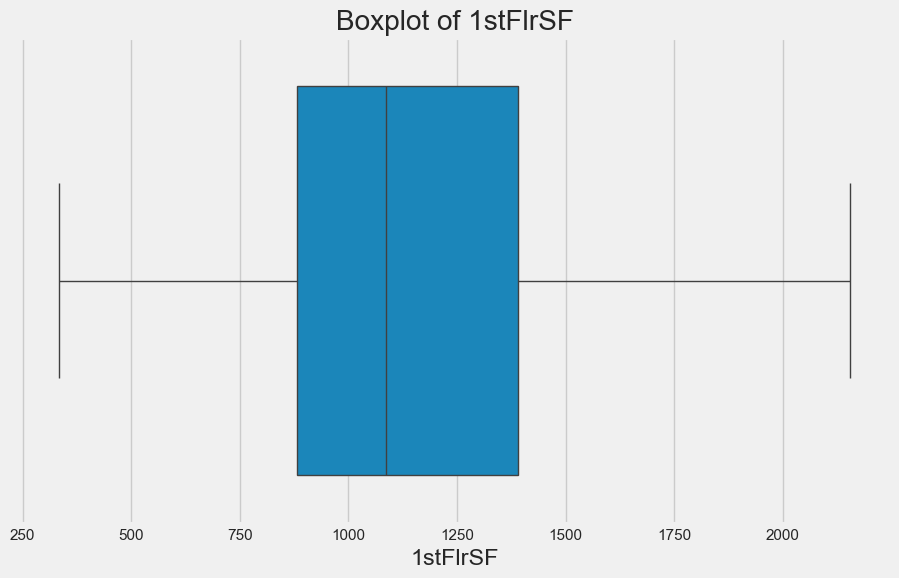

2ndFlrSF


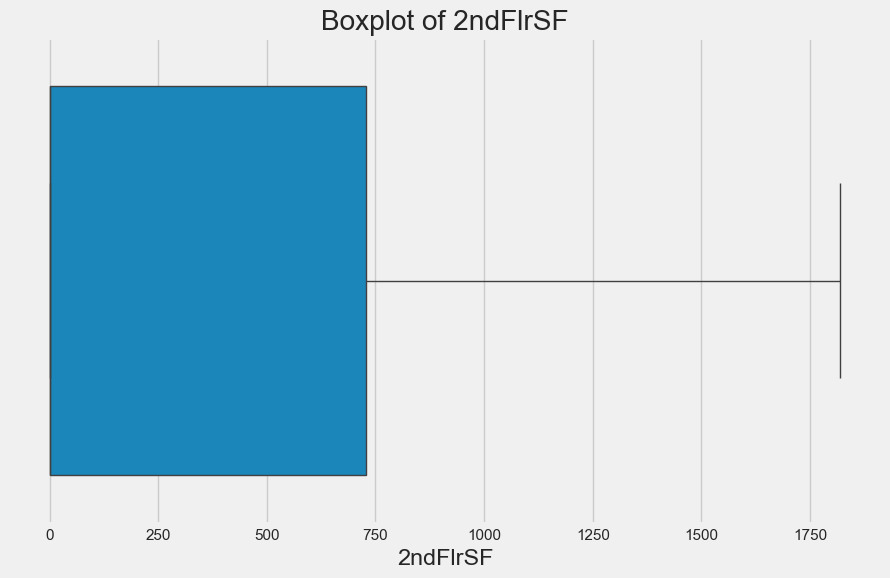

GrLivArea


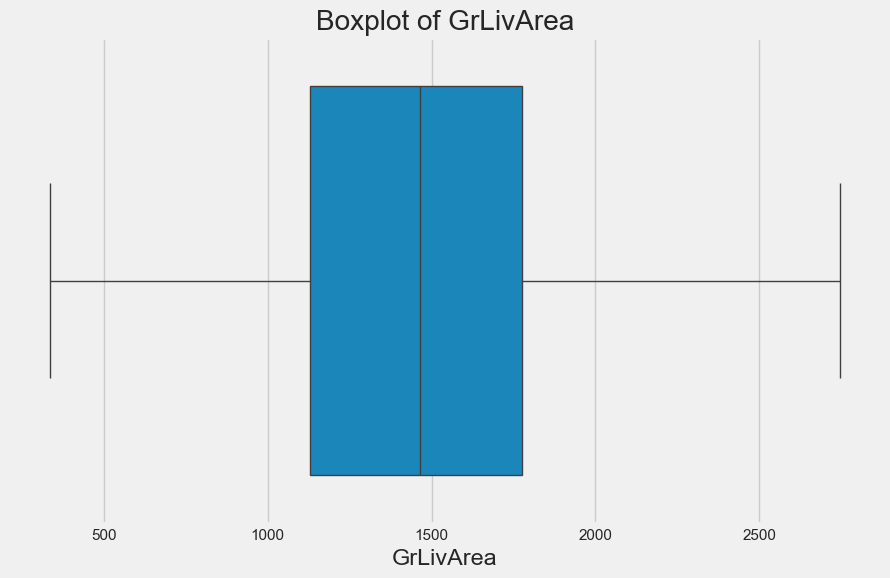

BsmtFullBath


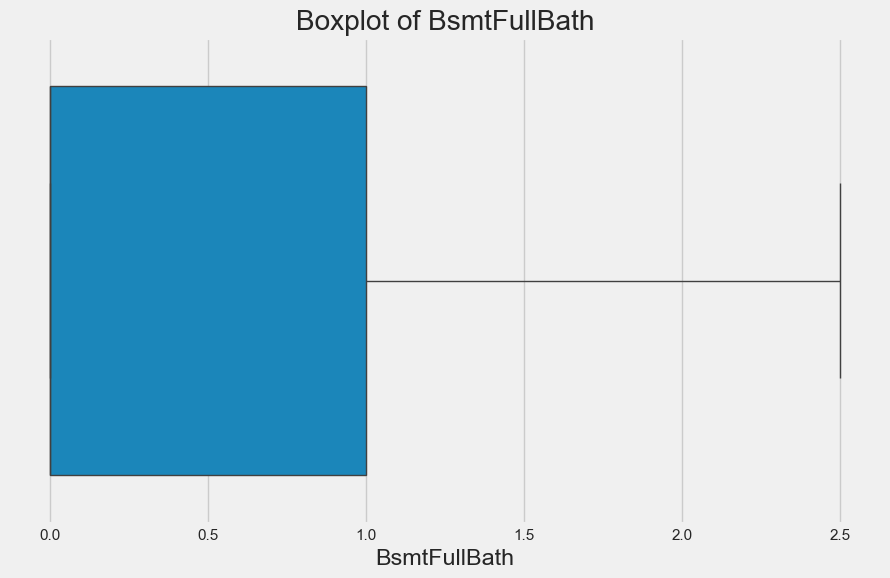

HalfBath


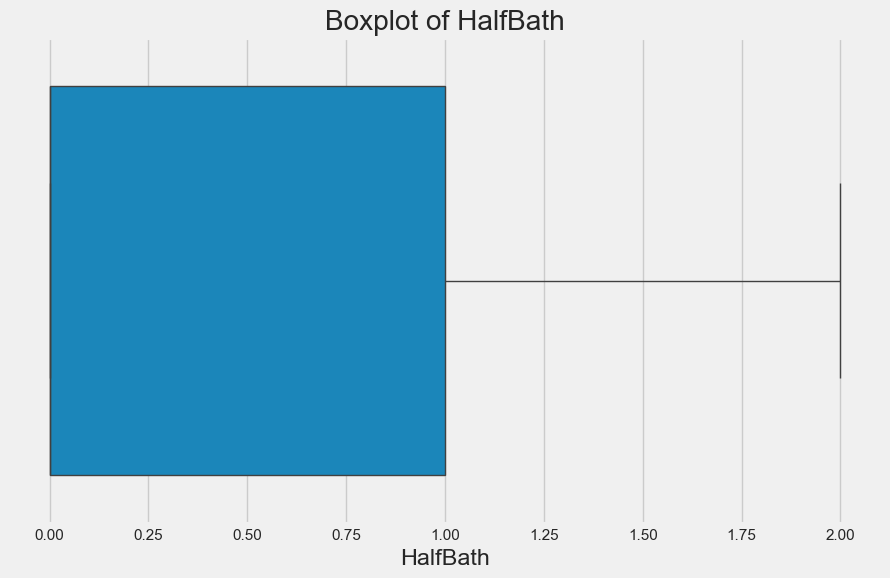

BedroomAbvGr


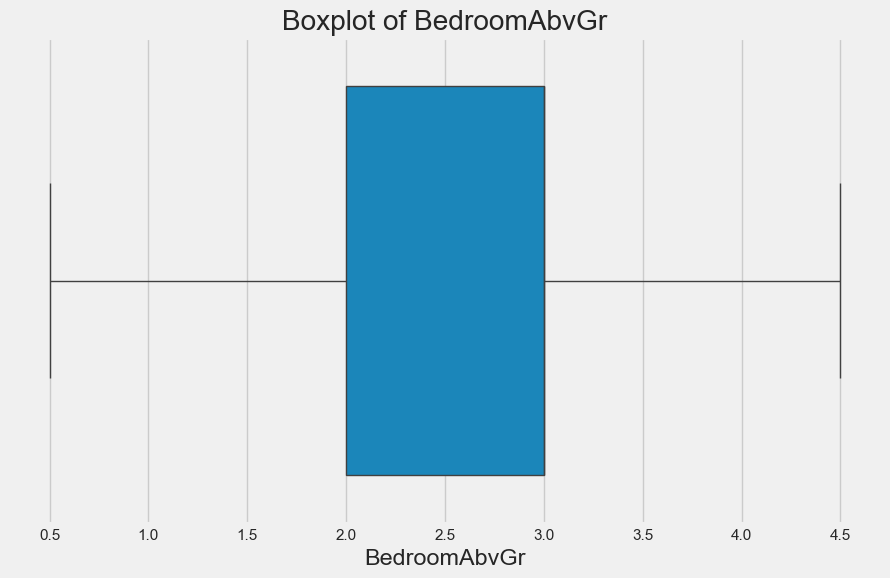

TotRmsAbvGrd


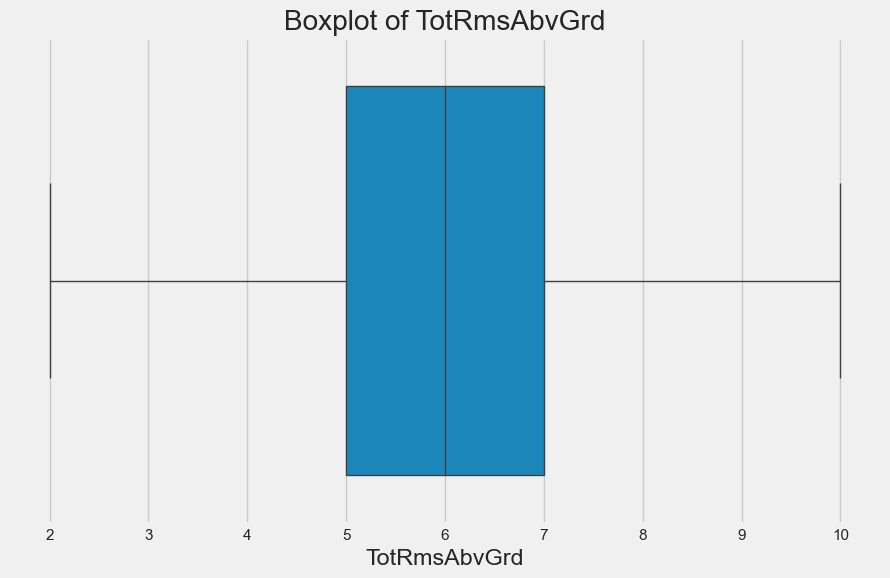

Fireplaces


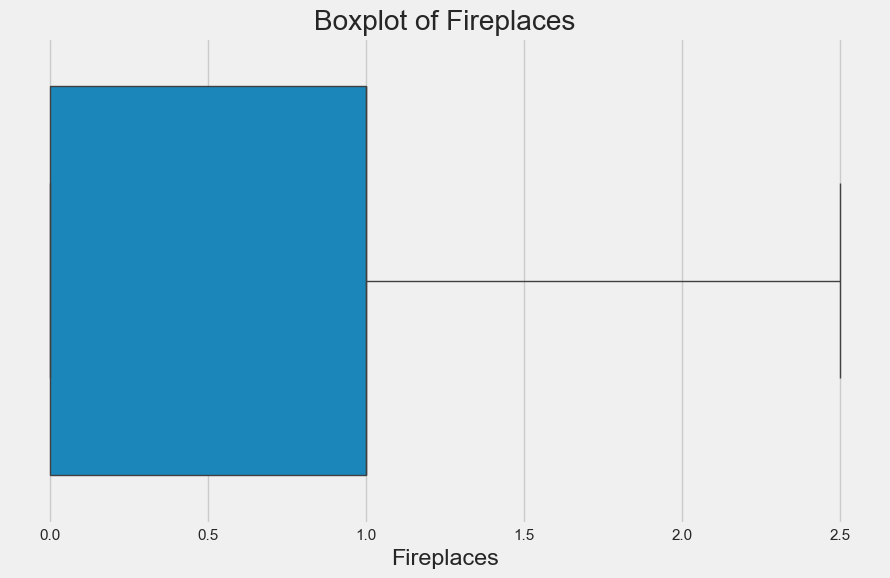

GarageYrBlt


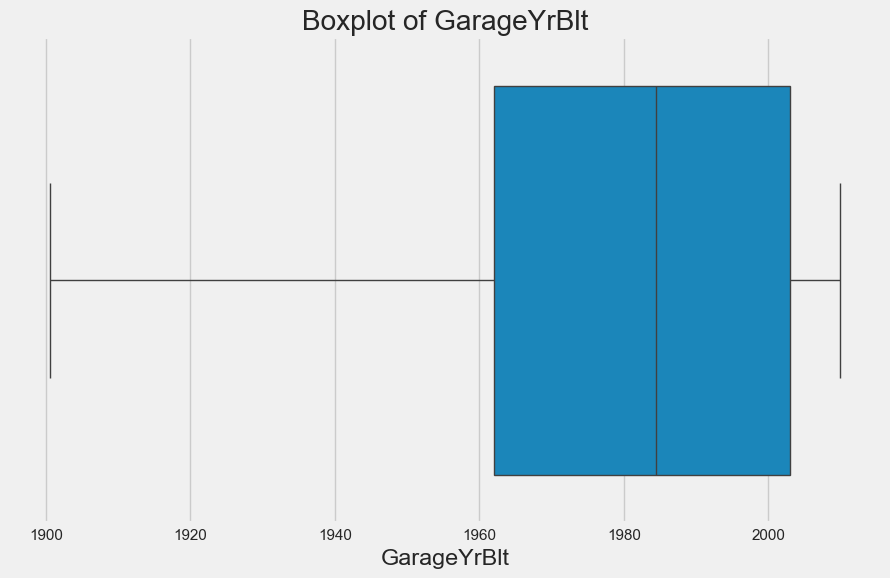

GarageCars


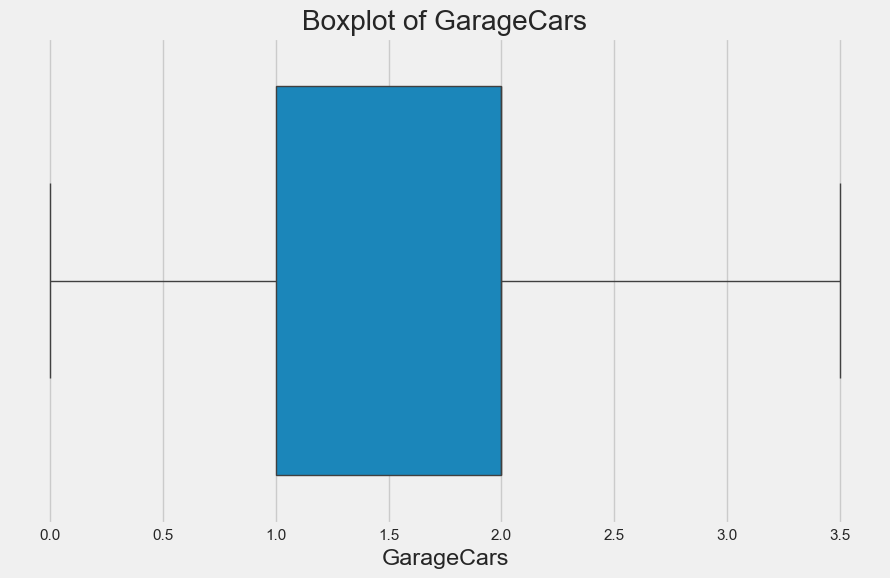

GarageArea


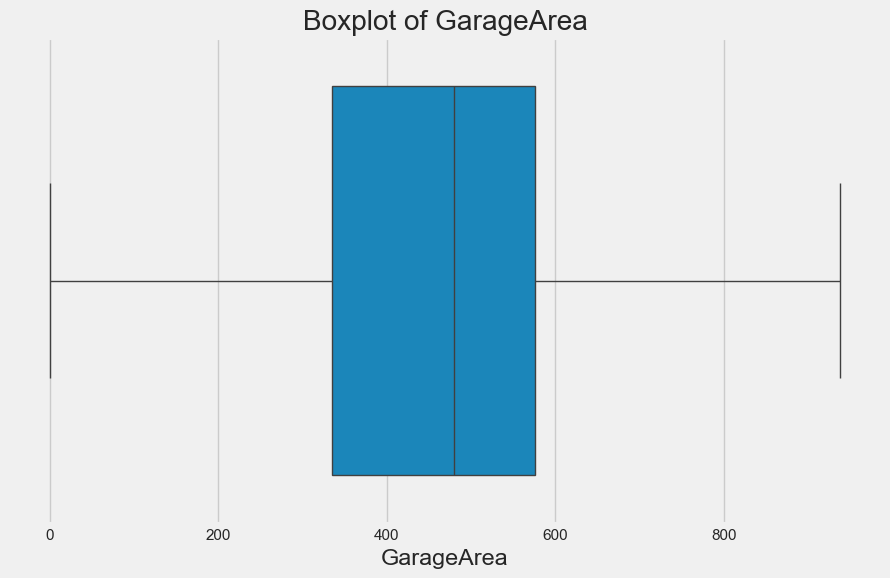

WoodDeckSF


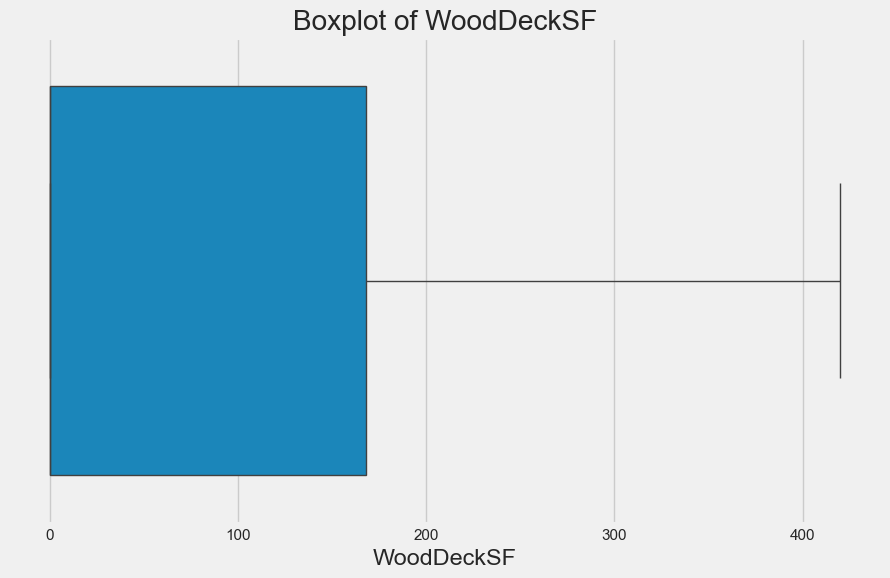

OpenPorchSF


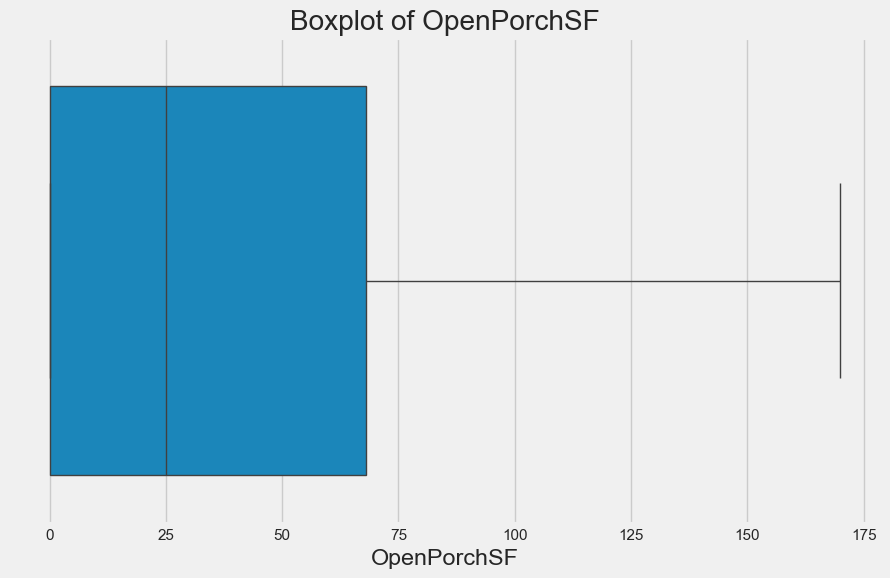

SalePrice


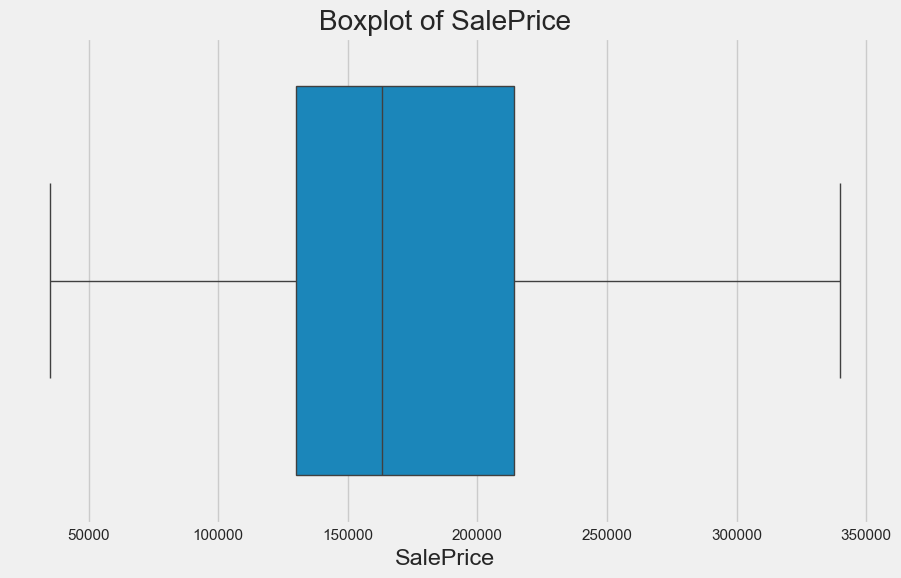

In [45]:
# Define the columns to be treated
columns_to_winsorize = ['MSSubClass', 'LotFrontage', 'LotArea', 'OverallQual', 'OverallCond', 'YearBuilt', 
                        'MasVnrArea', 'BsmtFinSF1', 'BsmtUnfSF', 'TotalBsmtSF',
                        '1stFlrSF', '2ndFlrSF', 'GrLivArea', 'BsmtFullBath', 
                        'HalfBath', 'BedroomAbvGr', 'TotRmsAbvGrd', 'Fireplaces',
                        'GarageYrBlt', 'GarageCars', 'GarageArea', 'WoodDeckSF', 'OpenPorchSF',
                        'SalePrice']

df_transformed = train_data.copy()

# Apply winsorization to each column
for col in columns_to_winsorize:
    winsorizer = Winsorizer(capping_method='iqr', tail='both', fold=1.5, variables=[col])
    df_transformed[col] = winsorizer.fit_transform(df_transformed[[col]])

# Generate boxplots for each column
for col in columns_to_winsorize:
    print(col)
    plt.figure(figsize=(10,6))
    sns.boxplot(x=df_transformed[col])
    plt.title(f'Boxplot of {col}')
    plt.show()

In [46]:
train_data['PoolArea'].unique()

array([  0, 512, 648, 576, 555, 480, 519, 738])

In [47]:
#Handle missing values
#train_data.fillna(method='ffill',inplace=True)
#Feature Scaling
#scaler = StandardScaler()
#scaled_data=scaler.fit_transform(train_data[['feature1','feature2']])

MSZoning


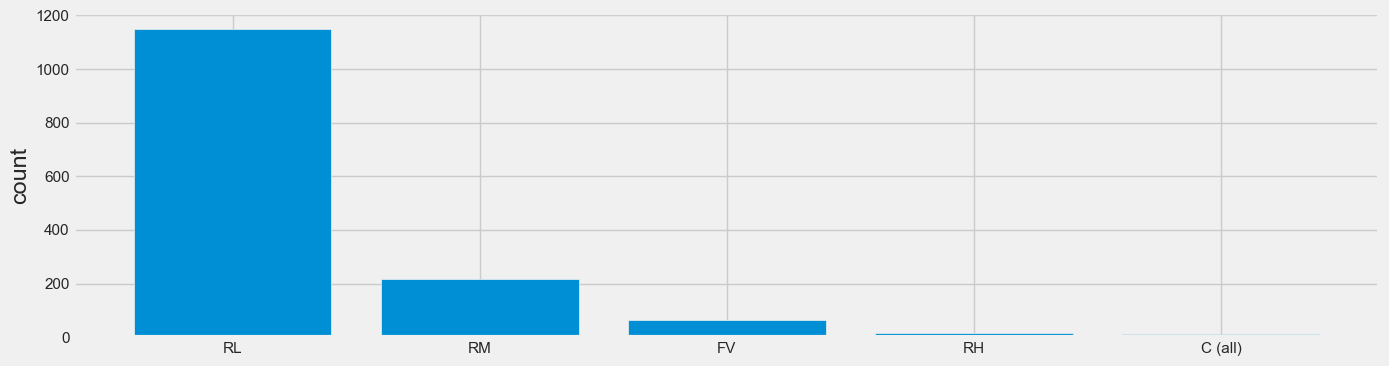

Street


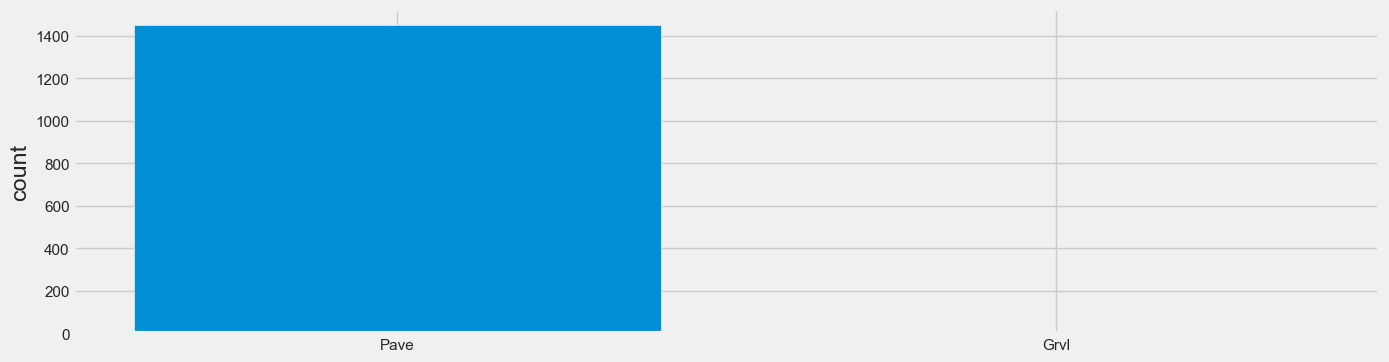

LotShape


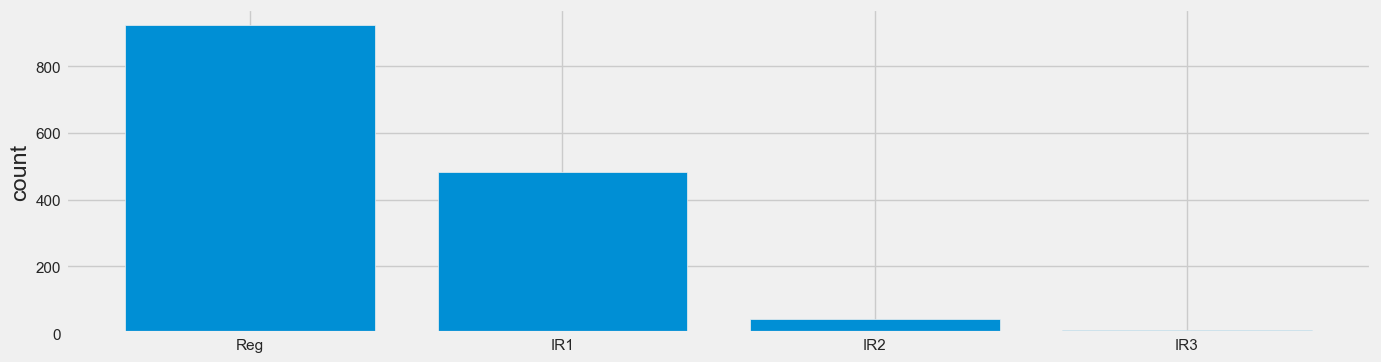

LandContour


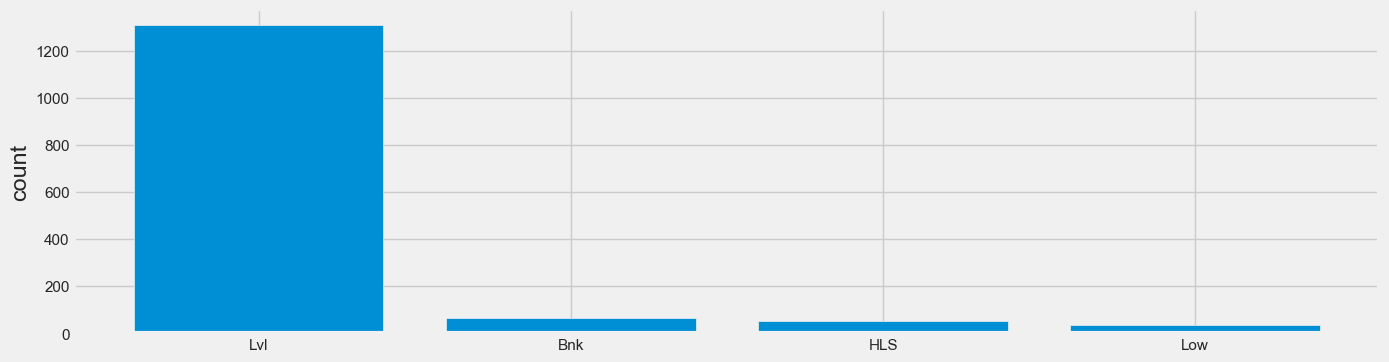

Utilities


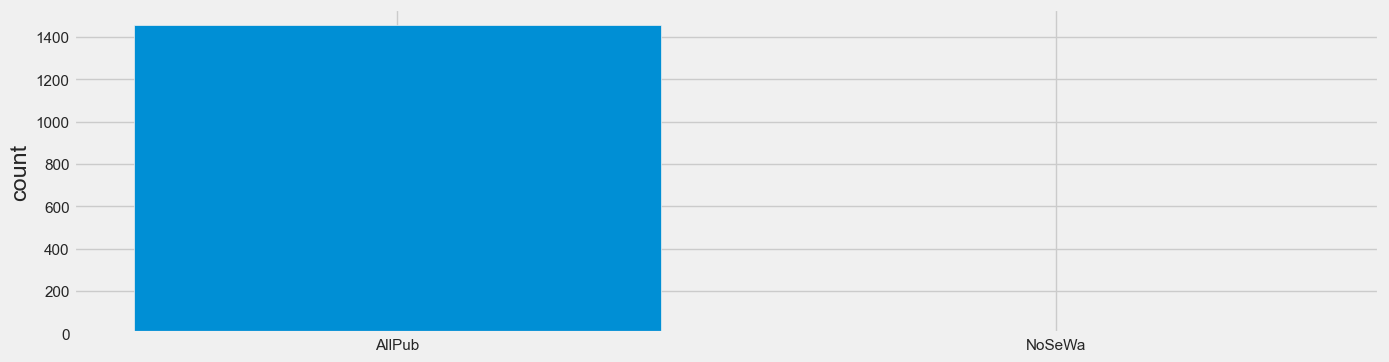

LotConfig


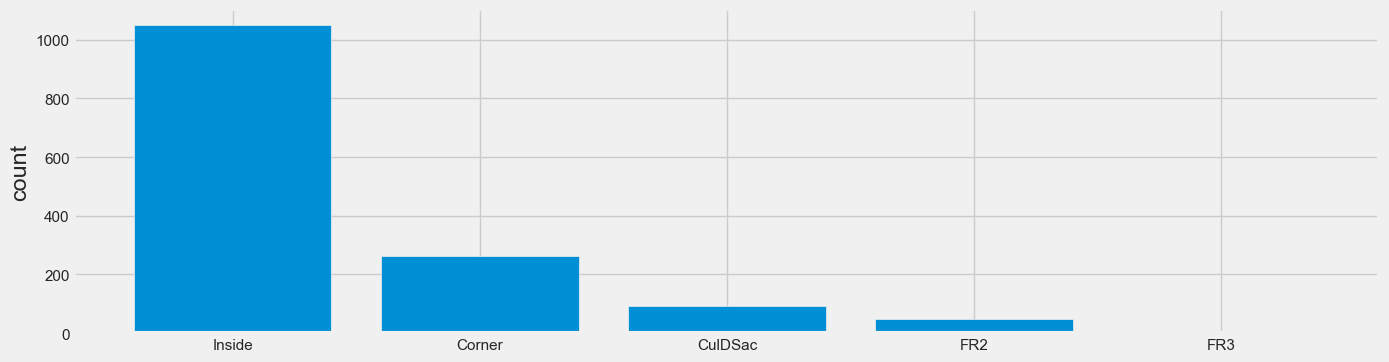

LandSlope


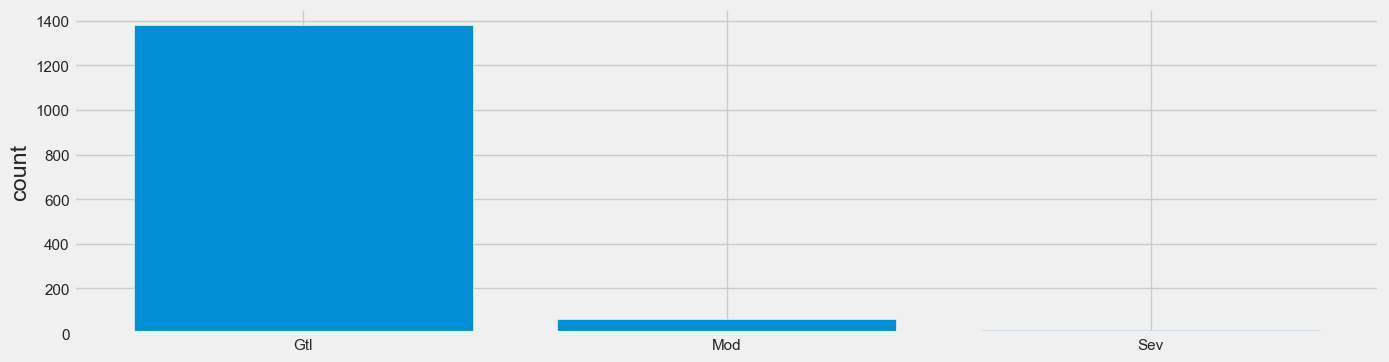

Neighborhood


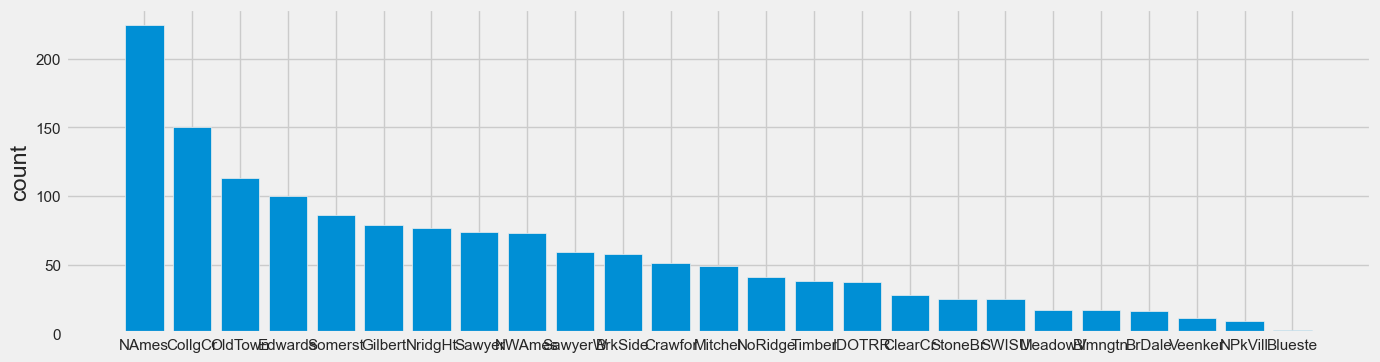

Condition1


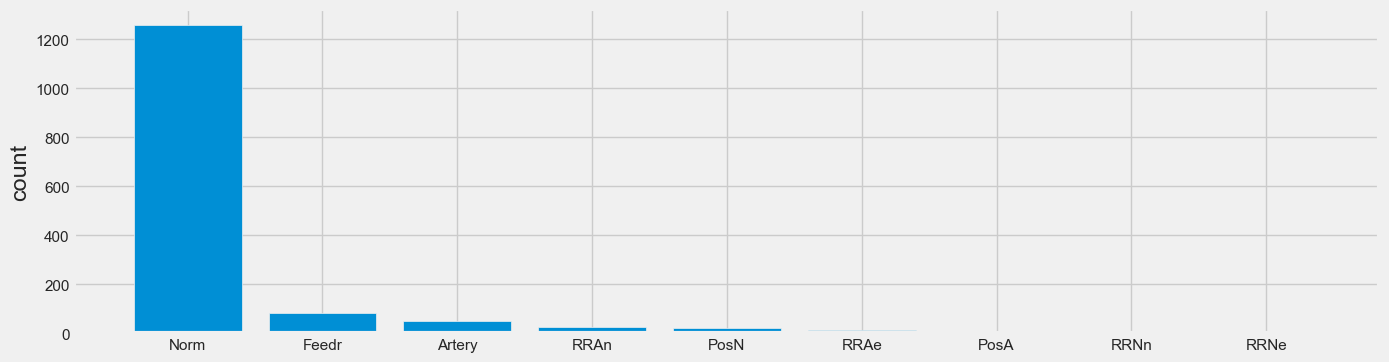

Condition2


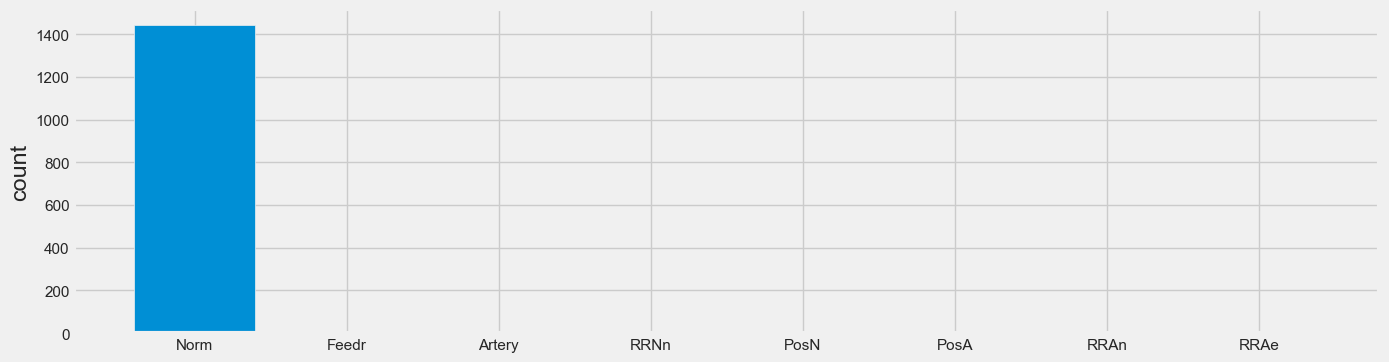

BldgType


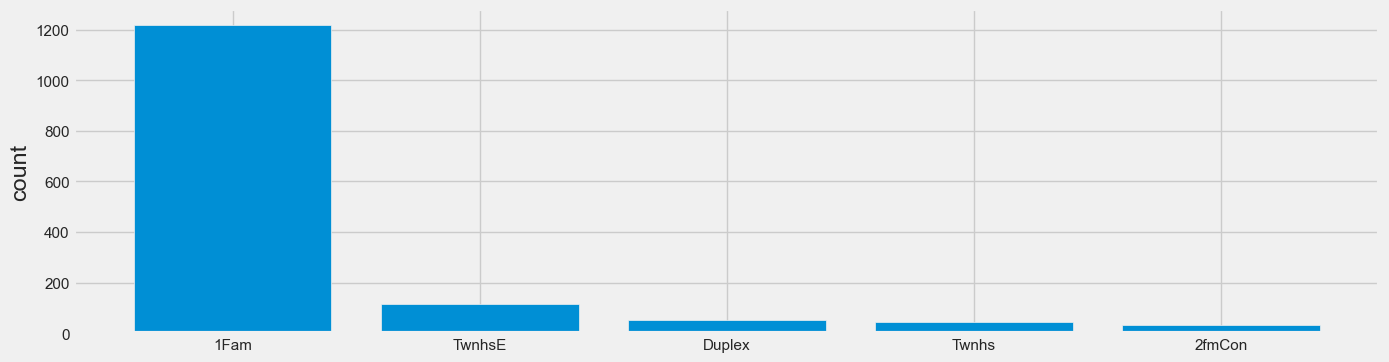

HouseStyle


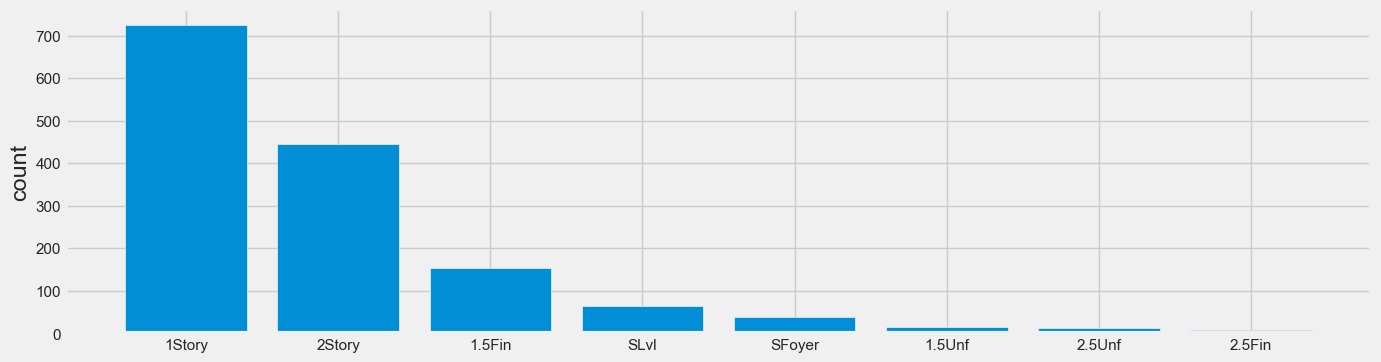

RoofStyle


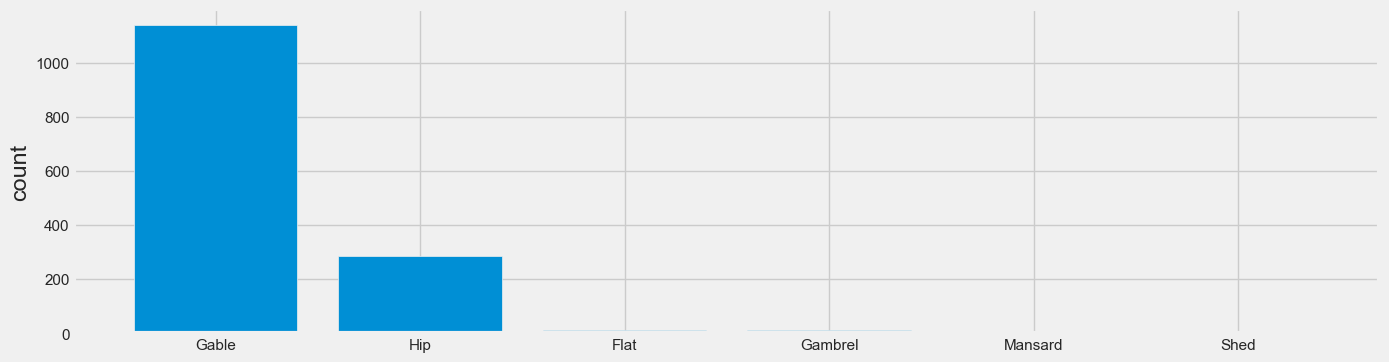

RoofMatl


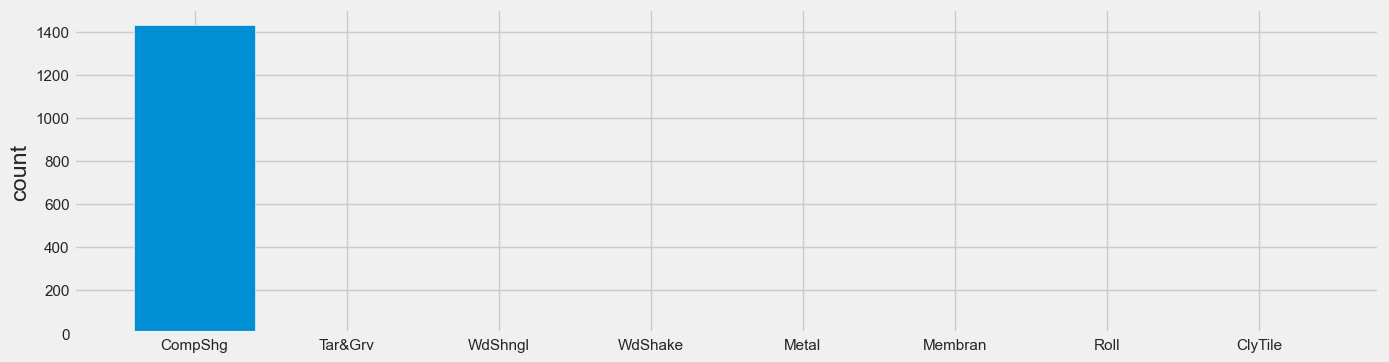

Exterior1st


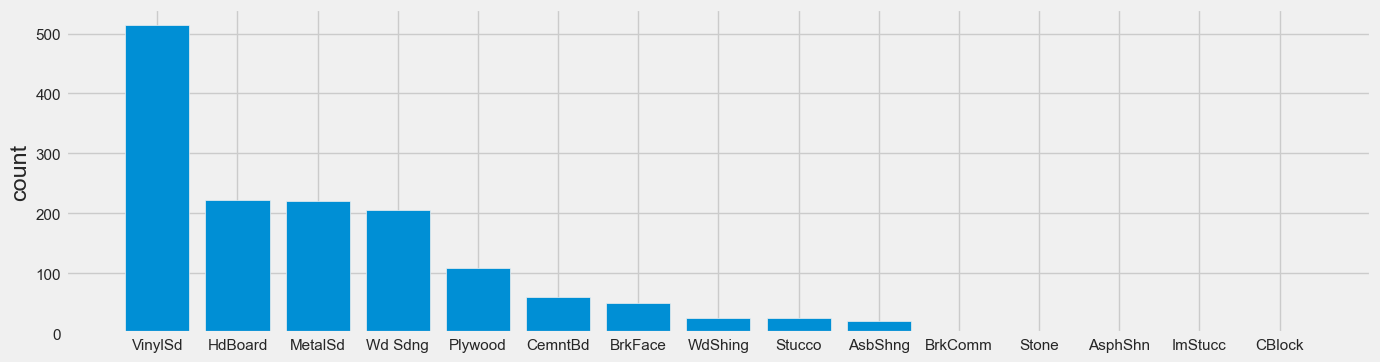

Exterior2nd


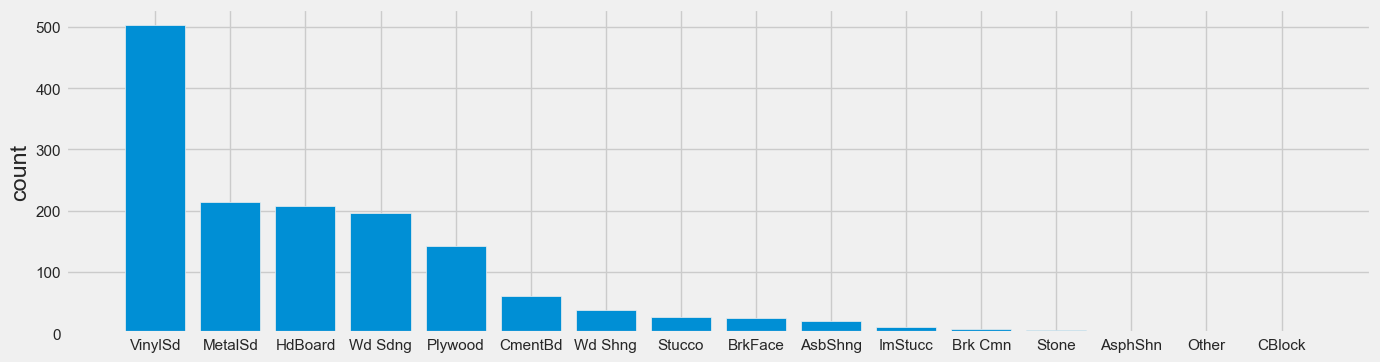

ExterQual


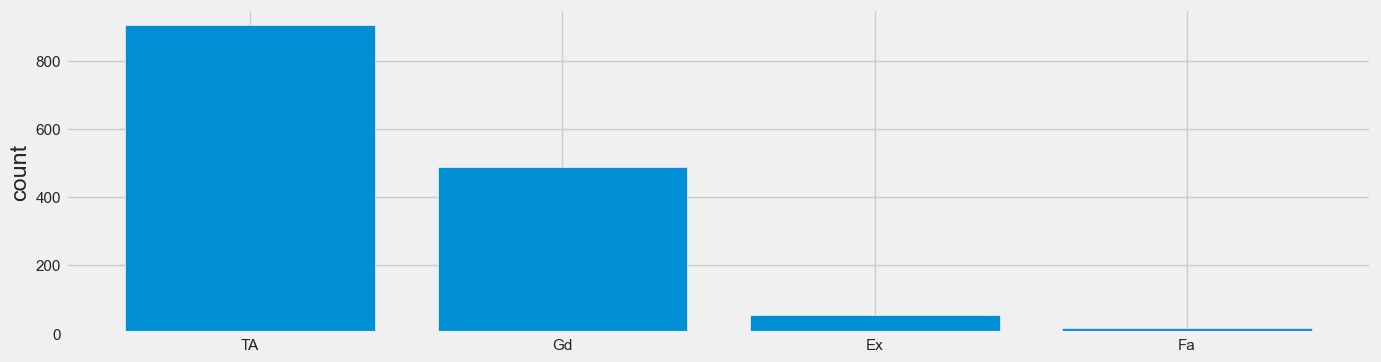

ExterCond


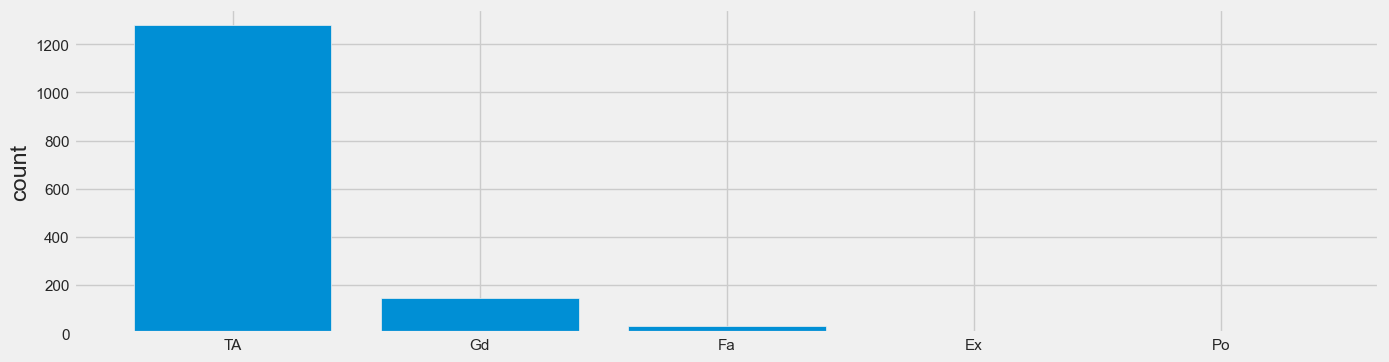

Foundation


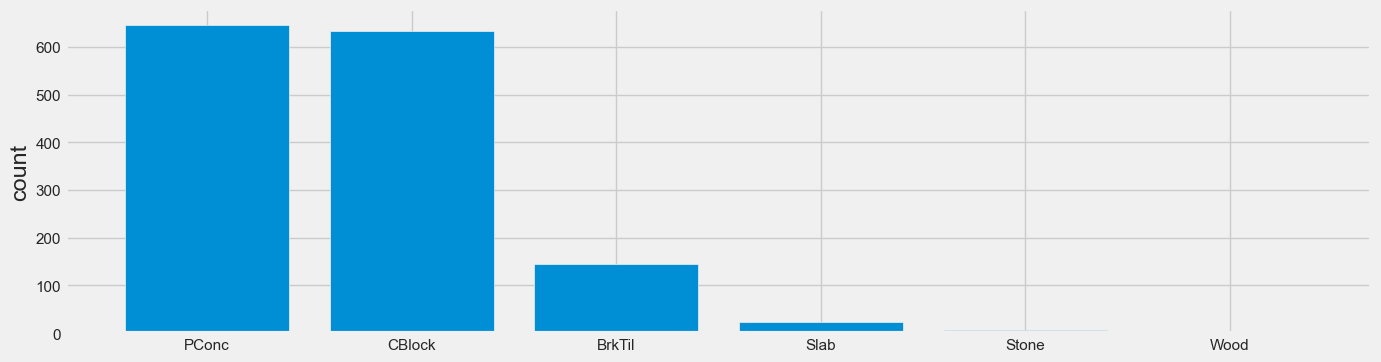

BsmtQual


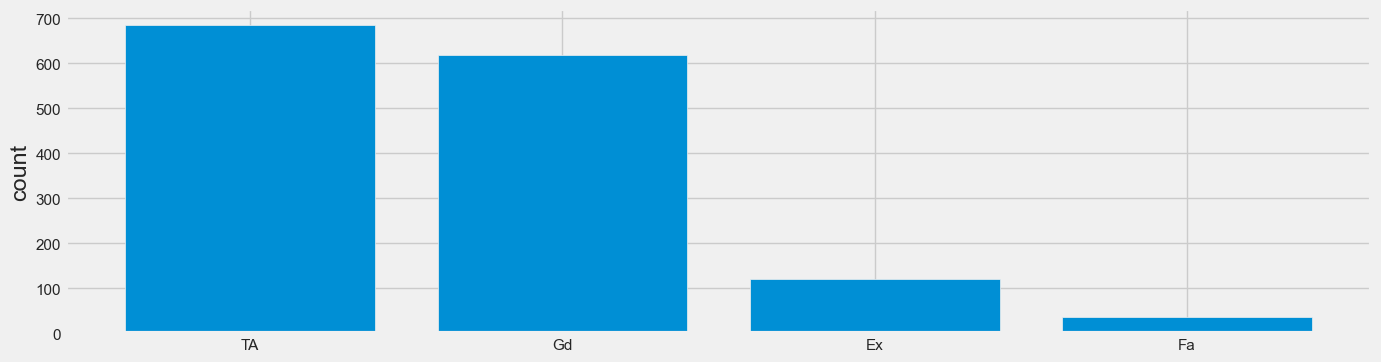

BsmtCond


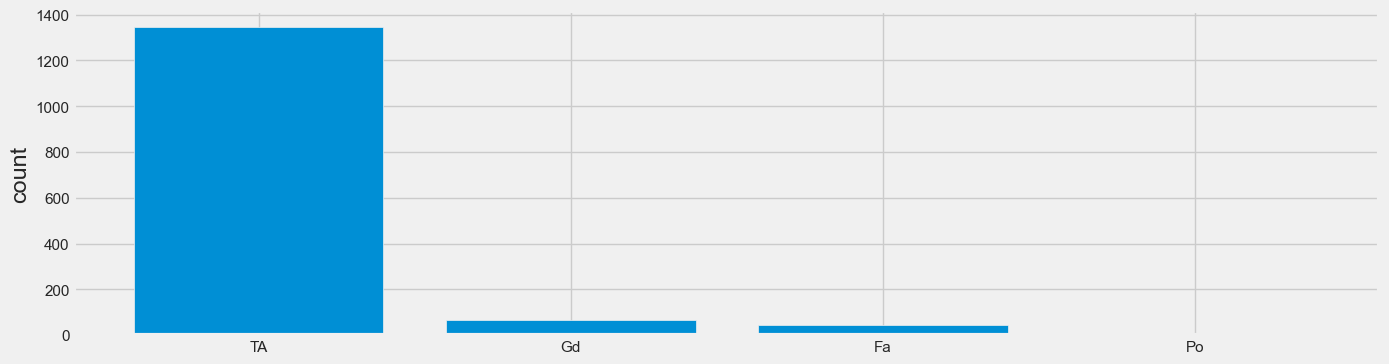

BsmtExposure


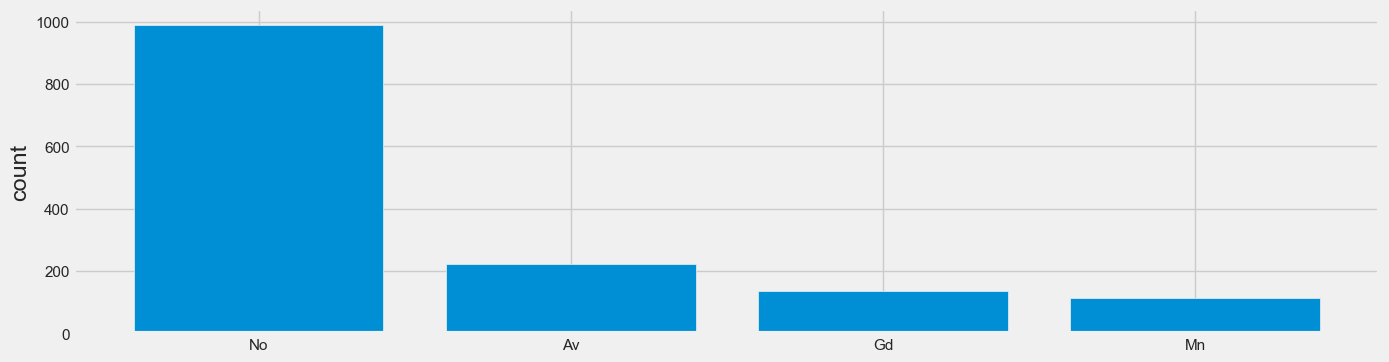

BsmtFinType1


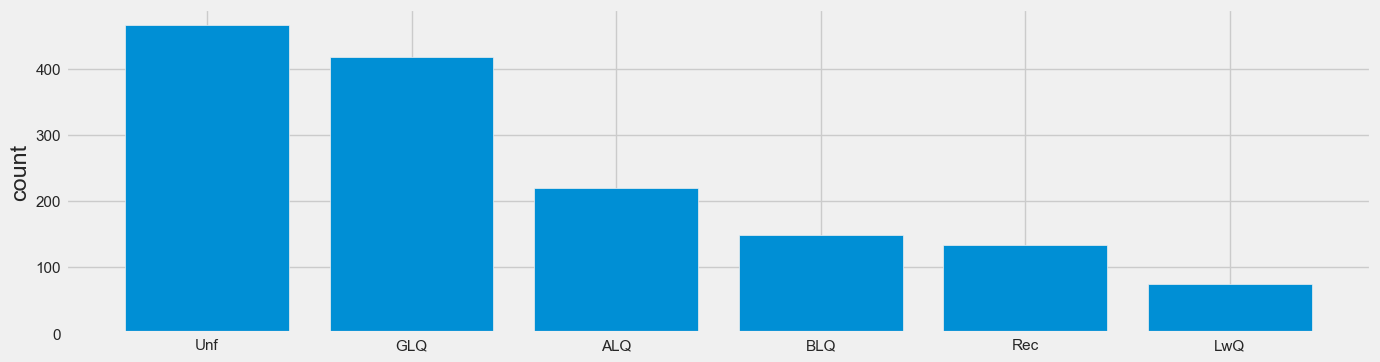

BsmtFinType2


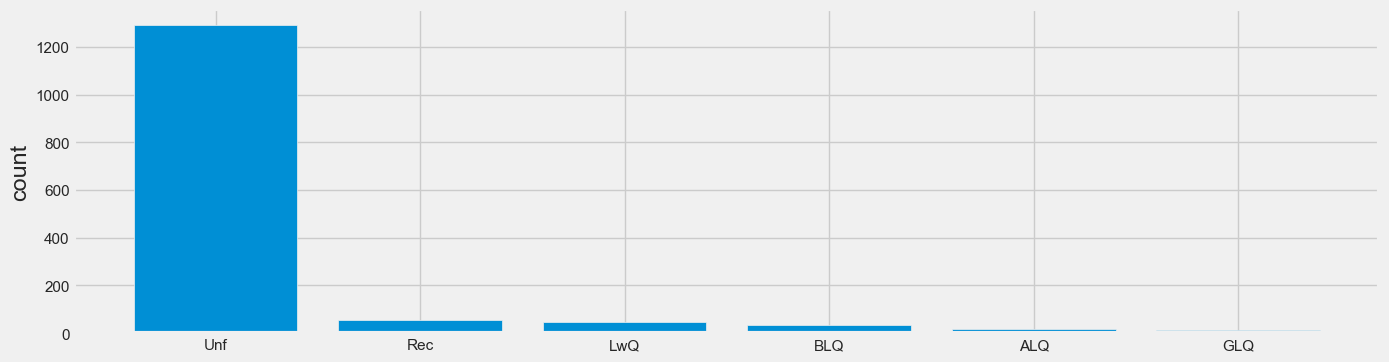

Heating


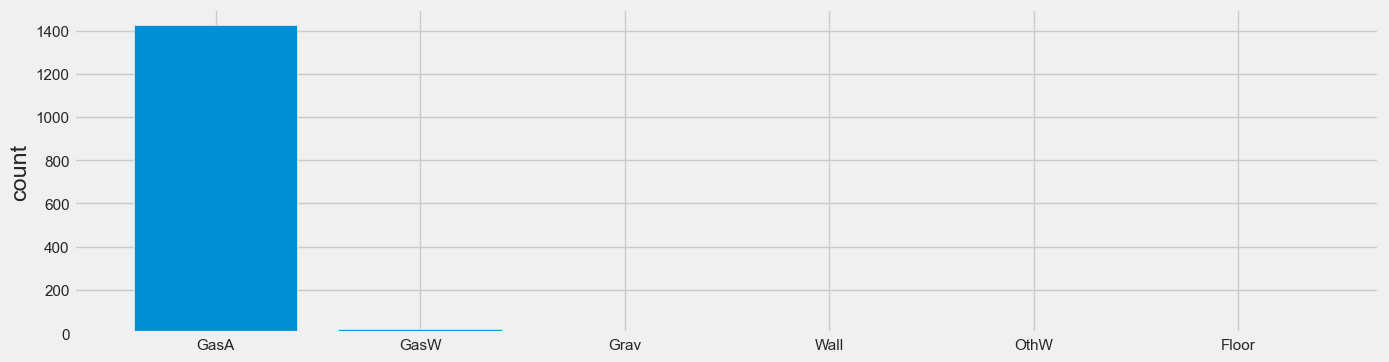

HeatingQC


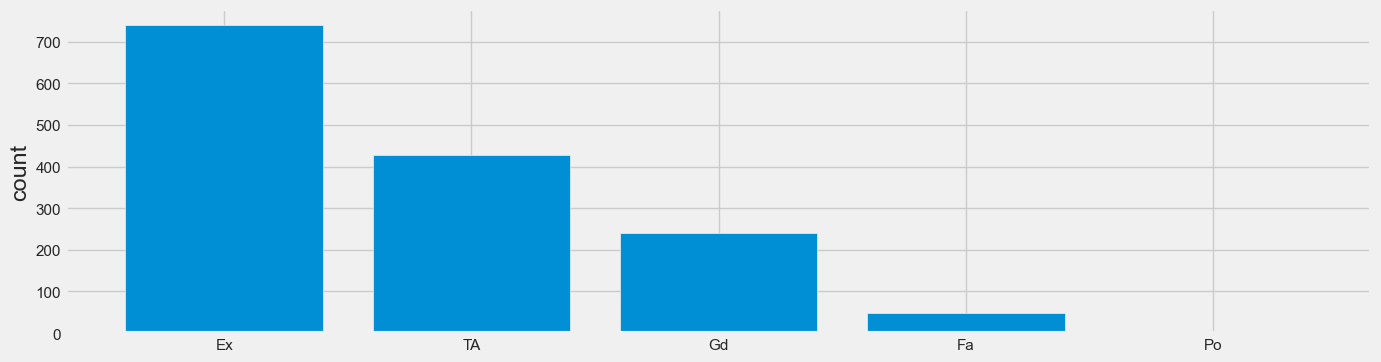

CentralAir


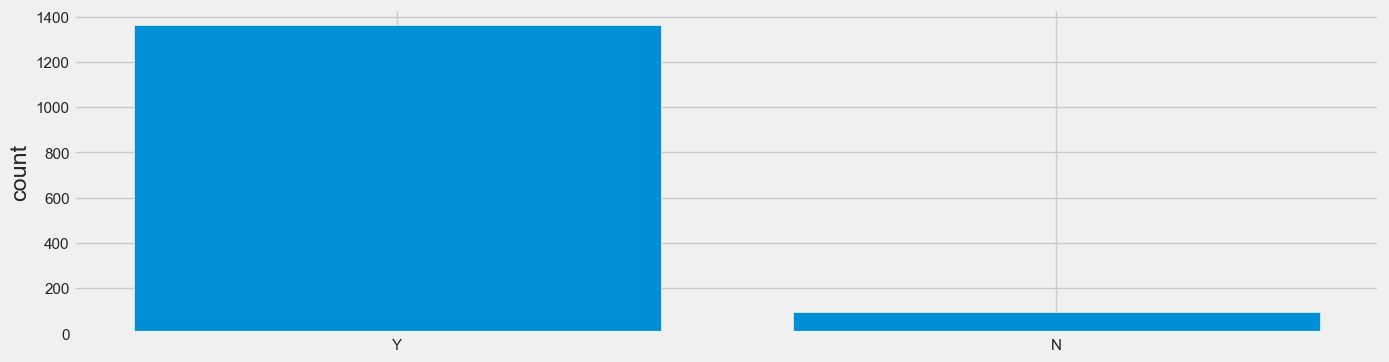

Electrical


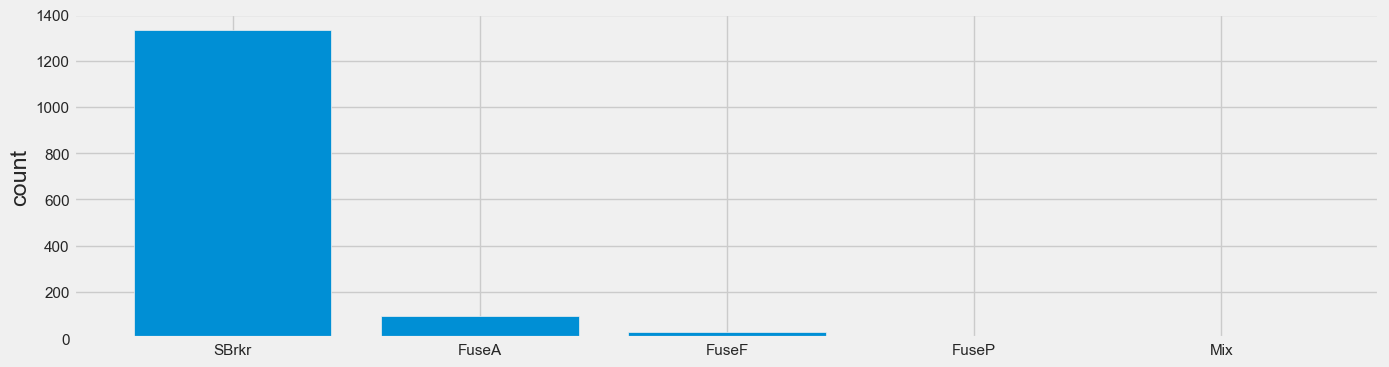

KitchenQual


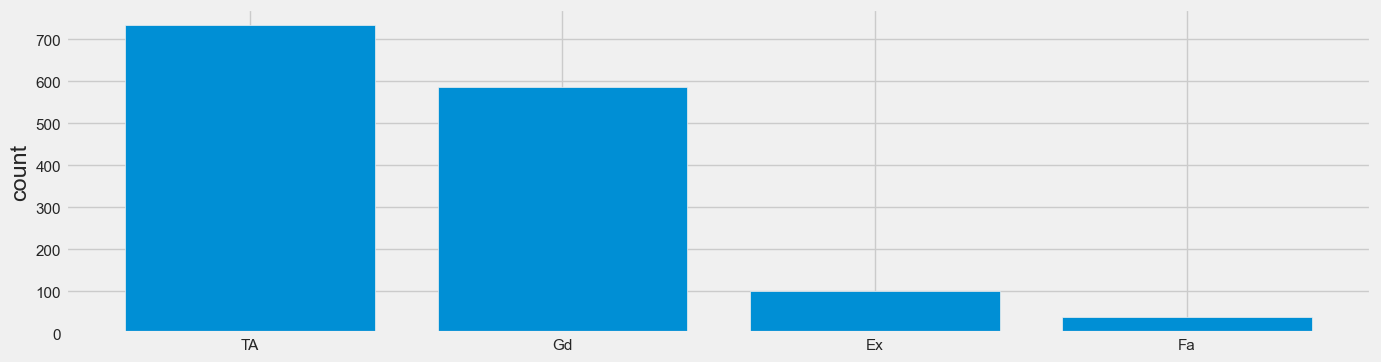

Functional


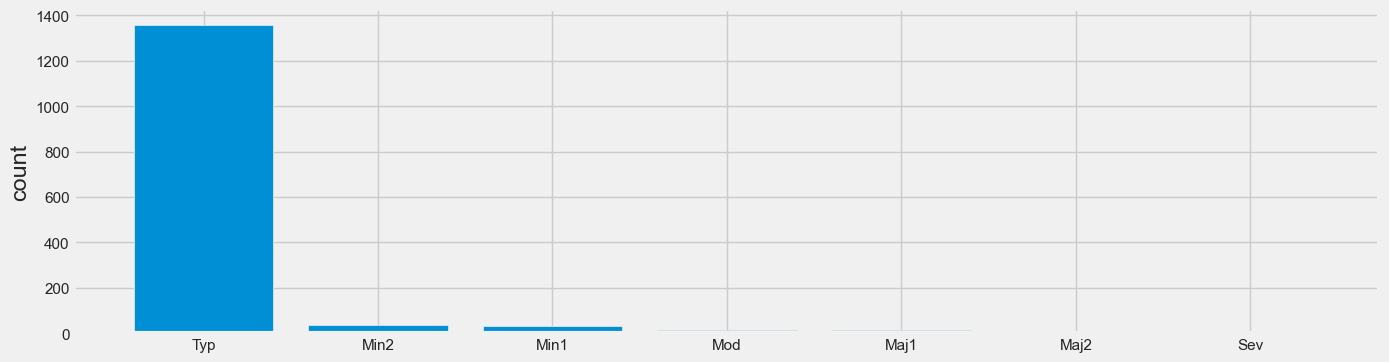

GarageType


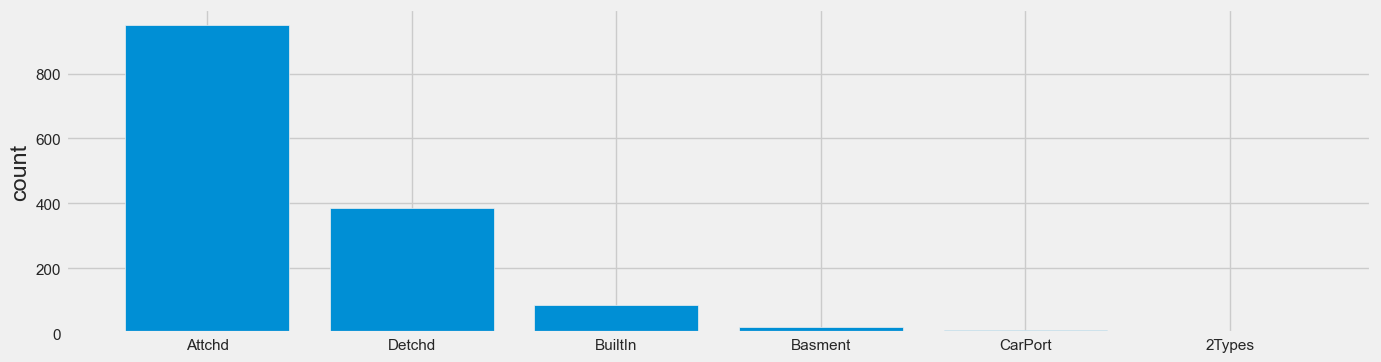

GarageFinish


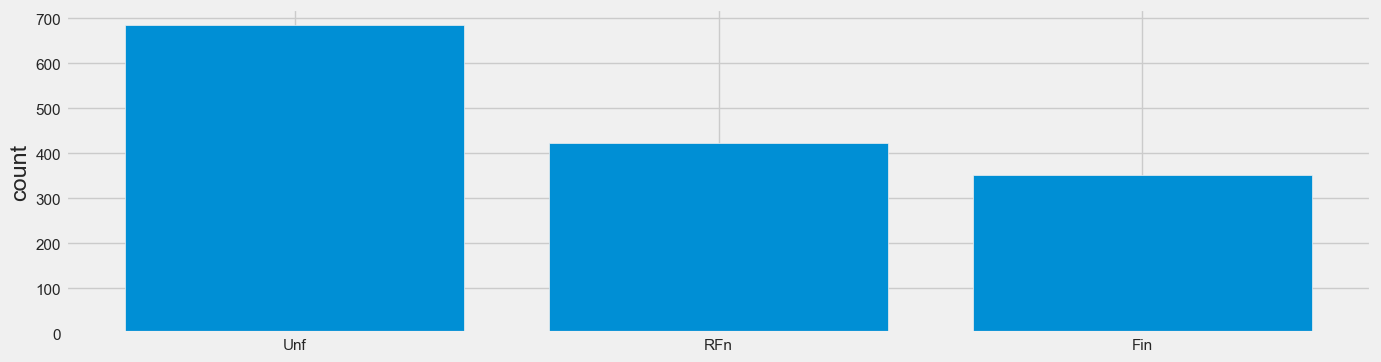

GarageQual


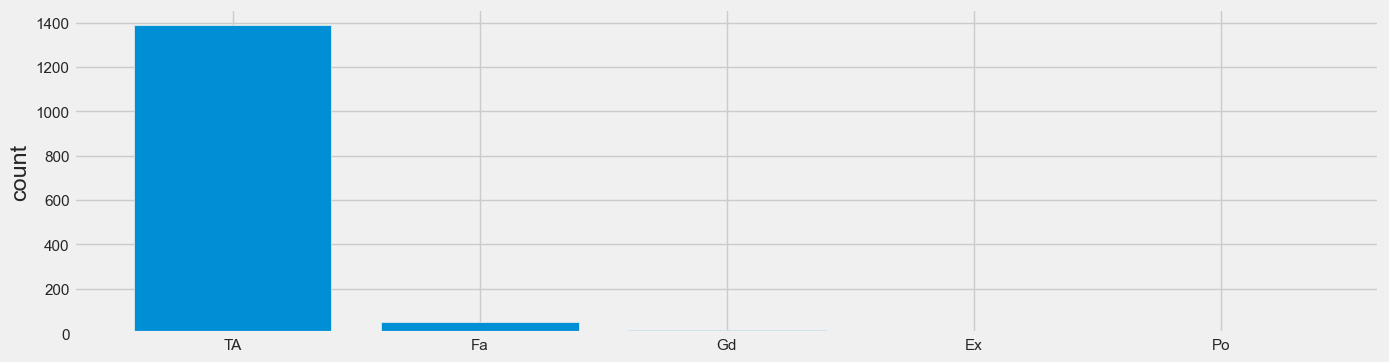

GarageCond


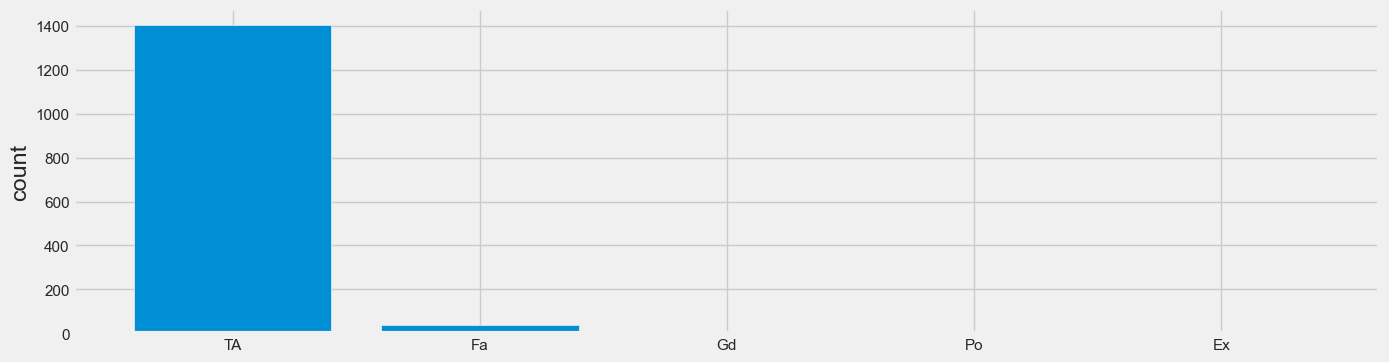

PavedDrive


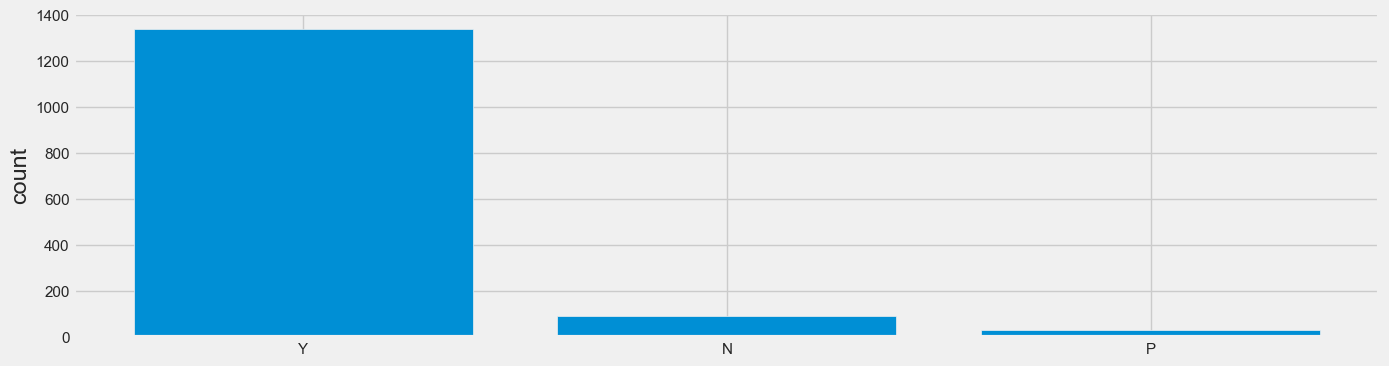

SaleType


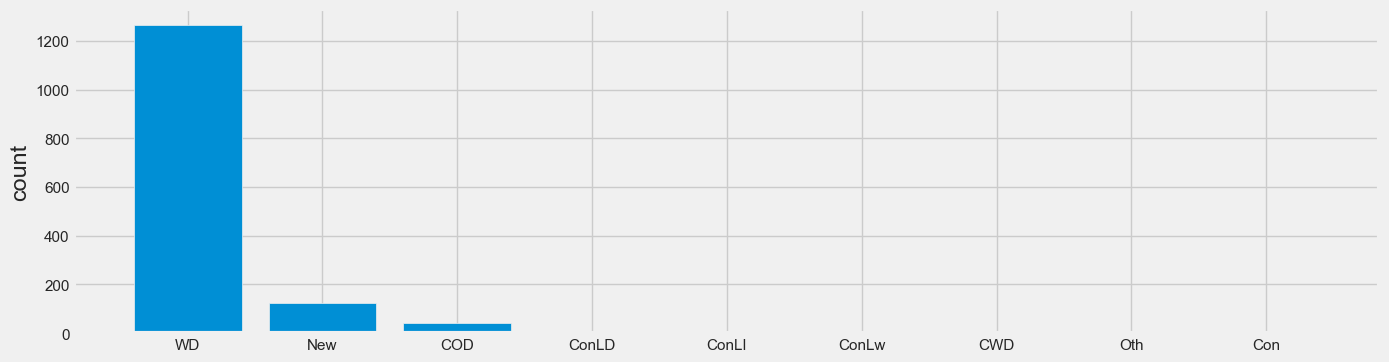

SaleCondition


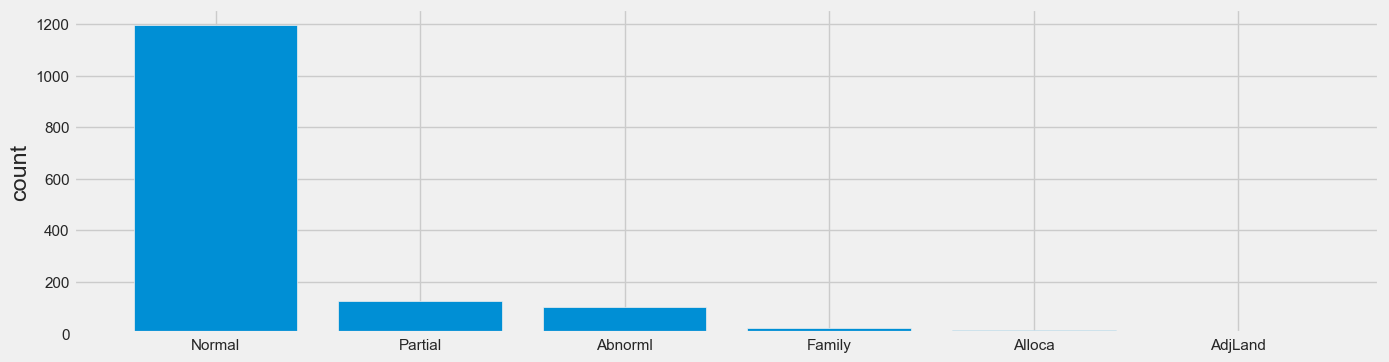

In [48]:
cat_cols3 = ['MSZoning', 'Street', 'LotShape', 'LandContour', 'Utilities',
       'LotConfig', 'LandSlope', 'Neighborhood', 'Condition1', 'Condition2',
       'BldgType', 'HouseStyle', 'RoofStyle', 'RoofMatl', 'Exterior1st',
       'Exterior2nd', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual',
       'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2', 'Heating',
       'HeatingQC', 'CentralAir', 'Electrical', 'KitchenQual', 'Functional',
       'GarageType', 'GarageFinish', 'GarageQual', 'GarageCond', 'PavedDrive',
       'SaleType', 'SaleCondition']


for col in cat_cols3:
    print(col)
    #print('Skew :', round(df4[col].skew(), 2))
    plt.figure(figsize = (15, 4))
    #plt.subplot(1, 2, 1)
    # Calculate the value counts
    counts = df_transformed[col].value_counts()

    # Plot the bar chart
    plt.bar(counts.index, counts.values)
    plt.ylabel('count')
   # plt.subplot(1, 2, 2)
    #sns.boxplot(x=df4[col])
    plt.show()

<Axes: xlabel='GarageFinish', ylabel='SalePrice'>

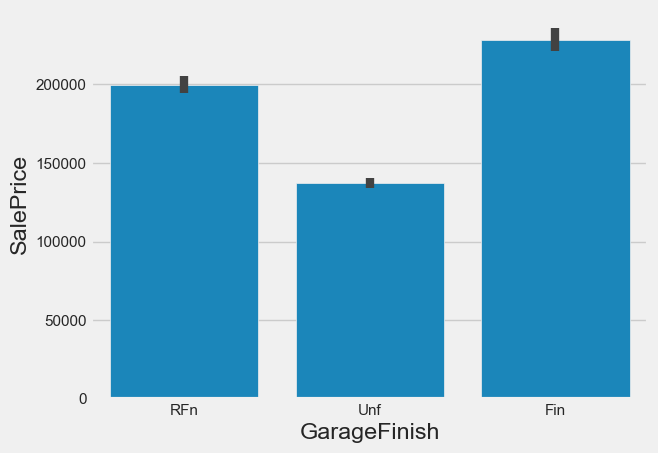

In [49]:
#plotting bar plot between number of bedrooms and premium charged.
sns.barplot(x='GarageFinish', y='SalePrice', data=df_transformed)

<Axes: xlabel='Street', ylabel='SalePrice'>

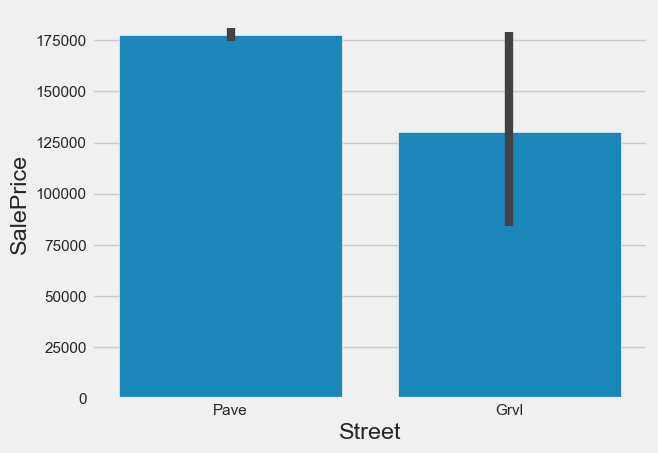

In [50]:
sns.barplot(x='Street', y='SalePrice', data=df_transformed)

<Axes: xlabel='Street', ylabel='SalePrice'>

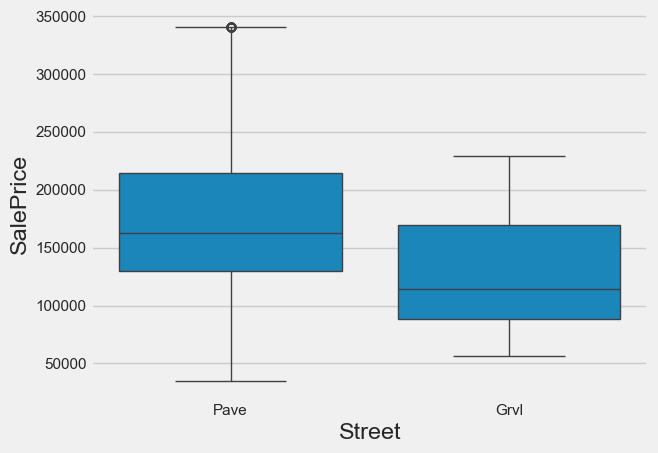

In [51]:
sns.boxplot(x='Street', y='SalePrice', data=df_transformed)

<Axes: xlabel='RoofStyle', ylabel='SalePrice'>

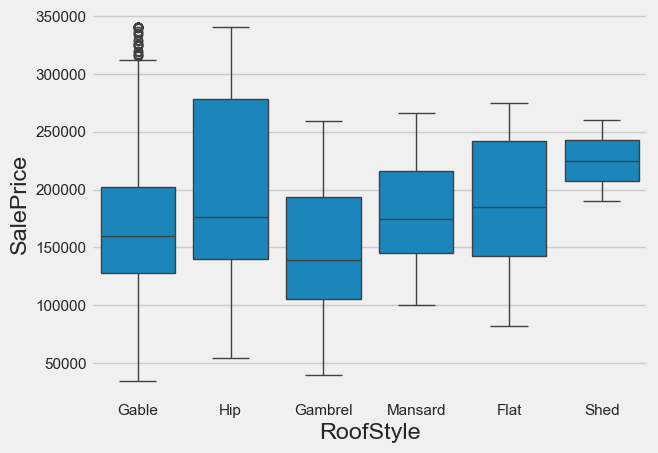

In [52]:
sns.boxplot(x='RoofStyle', y='SalePrice', data=df_transformed)

<Axes: xlabel='Electrical', ylabel='SalePrice'>

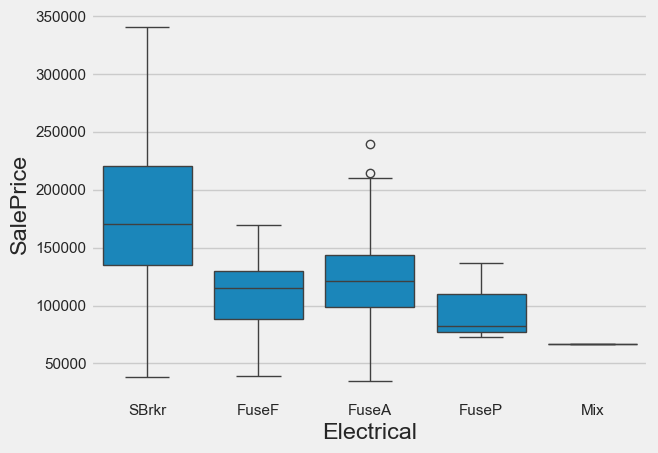

In [53]:
sns.boxplot(x='Electrical', y='SalePrice', data=df_transformed)

### Data Encoding

In [54]:
df_transformed.shape

(1460, 74)

In [55]:
[['MSZoning', 'Street', 'Alley', 'LotShape', 'LandContour', 'Utilities', 'LotConfig', 'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType', 'HouseStyle', 'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2', 'Heating', 'HeatingQC', 'CentralAir', 'Electrical', 'KitchenQual', 'Functional', 'FireplaceQu', 'GarageType', 'GarageFinish', 'GarageQual', 'GarageCond', 'PavedDrive', 'Fence', 'MiscFeature', 'SaleType', 'SaleCondition']]

[['MSZoning',
  'Street',
  'Alley',
  'LotShape',
  'LandContour',
  'Utilities',
  'LotConfig',
  'LandSlope',
  'Neighborhood',
  'Condition1',
  'Condition2',
  'BldgType',
  'HouseStyle',
  'RoofStyle',
  'RoofMatl',
  'Exterior1st',
  'Exterior2nd',
  'MasVnrType',
  'ExterQual',
  'ExterCond',
  'Foundation',
  'BsmtQual',
  'BsmtCond',
  'BsmtExposure',
  'BsmtFinType1',
  'BsmtFinType2',
  'Heating',
  'HeatingQC',
  'CentralAir',
  'Electrical',
  'KitchenQual',
  'Functional',
  'FireplaceQu',
  'GarageType',
  'GarageFinish',
  'GarageQual',
  'GarageCond',
  'PavedDrive',
  'Fence',
  'MiscFeature',
  'SaleType',
  'SaleCondition']]

In [56]:
#Checking the total number of categorical and numerical columns
cat_cols4=train_data.select_dtypes(include=['object']).columns
num_cols4 = train_data.select_dtypes(include=np.number).columns.tolist()
#categorical
print("Categorical Variables:")
print(cat_cols4)
print("sum of cat_variables:",len(cat_cols4))
#numerical
print("Numerical Variables:")
print(num_cols4)
print("sum of numerical_variables:",len(num_cols4))

Categorical Variables:
Index(['MSZoning', 'Street', 'LotShape', 'LandContour', 'Utilities',
       'LotConfig', 'LandSlope', 'Neighborhood', 'Condition1', 'Condition2',
       'BldgType', 'HouseStyle', 'RoofStyle', 'RoofMatl', 'Exterior1st',
       'Exterior2nd', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual',
       'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2', 'Heating',
       'HeatingQC', 'CentralAir', 'Electrical', 'KitchenQual', 'Functional',
       'GarageType', 'GarageFinish', 'GarageQual', 'GarageCond', 'PavedDrive',
       'SaleType', 'SaleCondition'],
      dtype='object')
sum of cat_variables: 37
Numerical Variables:
['MSSubClass', 'LotFrontage', 'LotArea', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd', 'MasVnrArea', 'BsmtFinSF1', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', '1stFlrSF', '2ndFlrSF', 'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'TotRmsAbvGrd', 'Fireplaces', 'Gar

In [57]:
df_transformed['LandSlope'].dtype

dtype('O')

In [58]:
df_transformed.shape


(1460, 74)

In [59]:
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import LabelEncoder

# List of categorical columns to one-hot encode
categorical_columns = ['MSZoning', 'Street', 'LotShape', 'LandContour', 'Utilities',
       'LotConfig', 'LandSlope', 'Neighborhood', 'Condition1', 'Condition2',
       'BldgType', 'HouseStyle', 'RoofStyle', 'RoofMatl', 'Exterior1st',
       'Exterior2nd', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual',
       'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2', 'Heating',
       'HeatingQC', 'CentralAir', 'Electrical', 'KitchenQual', 'Functional',
       'GarageType', 'GarageFinish', 'GarageQual', 'GarageCond', 'PavedDrive',
       'SaleType', 'SaleCondition']

# Initialize LabelEncoder
label_encoder = LabelEncoder()

# Loop through each column and apply label encoding
for col in categorical_columns:
    df_transformed[col] = label_encoder.fit_transform(df_transformed[col])
    

In [60]:
df_transformed.shape

(1460, 74)

In [63]:
# finding the correlation of your DataFrame
correlation_matrix = df_transformed.corr()

# Filter the correlation matrix based on the threshold
threshold = 0.7
highly_correlated = correlation_matrix.abs() >= threshold
correlation_matrix_filtered = correlation_matrix.mask(~highly_correlated)

# Flatten the filtered correlation matrix into a DataFrame
filtered_values = correlation_matrix_filtered.unstack().dropna()
filtered_values = filtered_values[filtered_values != 1]  # Exclude diagonal values

# Create a DataFrame to display the filtered correlation values
table_df = pd.DataFrame(filtered_values, columns=['Correlation'])

# Display the table
table_df

,,Correlation
MSSubClass,BldgType,0.771915
BldgType,MSSubClass,0.771915
OverallQual,SalePrice,0.817680
YearBuilt,GarageYrBlt,0.702217
Exterior1st,Exterior2nd,0.854163
Exterior2nd,Exterior1st,0.854163
BsmtFinType2,BsmtFinSF2,-0.739912
BsmtFinSF2,BsmtFinType2,-0.739912
TotalBsmtSF,1stFlrSF,0.807158
1stFlrSF,TotalBsmtSF,0.807158


# Clean training data

## Training

In [87]:
training_data = df_transformed.copy()

In [88]:
training_data = training_data.to_csv("TRAIN.csv",index=True)

In [89]:
dff2 = pd.read_csv("TRAIN.csv")

In [90]:
dff2.shape

(1460, 75)

In [92]:
dff2.head()

,Unnamed: 0,MSSubClass,MSZoning,LotFrontage,LotArea,Street,LotShape,LandContour,Utilities,LotConfig,...,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,0,60,3,65.0,8450.0,1,3,3,0,4,...,0,0,0,0,0,2,2008,8,4,208500.0
1,1,20,3,80.0,9600.0,1,3,3,0,2,...,0,0,0,0,0,5,2007,8,4,181500.0
2,2,60,3,68.0,11250.0,1,0,3,0,4,...,0,0,0,0,0,9,2008,8,4,223500.0
3,3,70,3,60.0,9550.0,1,0,3,0,0,...,272,0,0,0,0,2,2006,8,0,140000.0
4,4,60,3,84.0,14260.0,1,0,3,0,2,...,0,0,0,0,0,12,2008,8,4,250000.0


### After clening the train data in the "clean test_data_preparation_jupyter notebook"

In [95]:
#call the test data
test = pd.read_csv("TEST.csv")

In [96]:
test.shape

(1459, 75)

In [97]:
test.head()

,Unnamed: 0,MSSubClass,MSZoning,LotFrontage,LotArea,Street,LotShape,LandContour,Utilities,LotConfig,...,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,0,20,2,80.0,11622.0,1,3,3,0,4,...,0,0,120,0,0,6,2010,8,4,169277.052498
1,1,20,3,81.0,14267.0,1,0,3,0,0,...,0,0,0,0,12500,6,2010,8,4,187758.393989
2,2,60,3,74.0,13830.0,1,0,3,0,4,...,0,0,0,0,0,3,2010,8,4,183583.683570
3,3,60,3,78.0,9978.0,1,0,3,0,4,...,0,0,0,0,0,6,2010,8,4,179317.477511
4,4,120,3,43.0,5005.0,1,0,1,0,4,...,0,0,144,0,0,1,2010,8,4,150730.079977


# Merged the test and train dataset into one
### Thisi is to have one dataframe to ease model development phase

In [104]:
df =pd.concat([dff2,test])

In [105]:
df.shape

(2919, 75)

In [129]:
Merged_data = df.copy()

In [130]:
Merged_data = Merged_data.to_csv("test_train.csv",index=True)
